# Employee Attrition Prediction

Employee attrition atau tingkat keluarnya karyawan dari perusahaan merupakan tantangan kritis bagi organisasi yang ingin mempertahankan stabilitas dan produktivitas tenaga kerja. Tingginya tingkat attrition dapat menyebabkan peningkatan biaya rekrutmen, hilangnya pengetahuan institusional, serta gangguan pada operasi bisnis. Dengan memprediksi kemungkinan attrition, perusahaan dapat mengambil langkah proaktif untuk meningkatkan kepuasan karyawan, mengoptimalkan strategi retensi, dan mengalokasikan sumber daya secara lebih efisien.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
import seaborn as sns
import math
from random import randint

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

Pada Block Code diatas dilakukan Import Library dan Package yang digunakan pada proyek kali ini, Langkah ini penting agar semua kode dapat dijalankan.

# Data Overview
pada tahap ini kita akan melakukan overview terhadap dataset yang akan dijadikan bahan analisis dan prediksi. Dataset yang digunakan: [HR Employee Data]((https://www.kaggle.com/datasets/patelprashant/employee-attrition/data))

In [7]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.shape)
df.sample(5)

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
193,43,No,Non-Travel,1344,Research & Development,7,3,Medical,1,262,...,4,80,3,7,3,4,5,4,2,2
288,26,Yes,Travel_Rarely,1449,Research & Development,16,4,Medical,1,394,...,4,80,1,5,2,3,3,2,0,2
1405,31,No,Non-Travel,697,Research & Development,10,3,Medical,1,1979,...,3,80,1,13,2,4,11,7,4,8
117,36,No,Travel_Frequently,1467,Sales,11,2,Technical Degree,1,154,...,3,80,1,10,6,3,9,7,2,8
1393,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7


Blok kode diatas ditujukan untuk read data dan memasukkan-nya kedalam variabel, serta melihat sample data

Dari hasil diatas, didapati bahwa terdapat 1470 baris data dan 35 fitur/kolom sebagai variabel analisis

- Menampilkan kolom/fitur dari data, dan overview terhadap data yang terdapat dalam setiap fitur/kolom

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Blok kode diatas untuk menampilakan informasi kolom dataframe, Dari hasil diatas ditampilkan informasi dari kolom beserta jumlah baris data pada dataframe

In [ ]:
nums = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
cats = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

Blok kode diatas untuk memisahkan data kategorikal dan numerikal pada dataframe, Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

In [9]:
hasil = []
for col in df.columns:
    hasil.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])

##presentasi jumlah null, diguakan untuk feature selection (Biasanya diatas 5% dihapus *tergantung kesepakatan team)
output = pd.DataFrame(data=hasil, columns='kolom tipedata jumlahnull persenull jumlahunik contohunik'.split())
output

,kolom,tipedata,jumlahnull,persenull,jumlahunik,contohunik
0,Age,int64,0,0.0,43,"[41, 49, 37, 33]"
1,Attrition,object,0,0.0,2,"[Yes, No]"
2,BusinessTravel,object,0,0.0,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,int64,0,0.0,886,"[1102, 279, 1373, 1392]"
4,Department,object,0,0.0,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,int64,0,0.0,29,"[1, 8, 2, 3]"
6,Education,int64,0,0.0,5,"[2, 1, 4, 3]"
7,EducationField,object,0,0.0,6,"[Life Sciences, Other, Medical, Marketing]"
8,EmployeeCount,int64,0,0.0,1,[1]
9,EmployeeNumber,int64,0,0.0,1470,"[1, 2, 4, 5]"


Blok kode diatas ditujukan untuk melakukan overview pada dataframe

Dari hasil diatas diperoleh dataset terdiri dari kolom numerik dan kolom kategorikal, dan dalam setiap kolom tidak ditemukan nilai Null atau Missing Value.

- Menampilkan deskripsi statistik dari data

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Blok kode diatas ditujukan untuk melihat deskripsi statistik dataframe,

Beberapa kolom numerik skew (dilihat dari perbedaan yang besar antara mean dan median) seperti `MonthlyIncome` <br>
Jika diperhatikan terdapat 2 kolom yang hanya memiliki 1 nilai sehingga kedepan bisa di drop yaitu `StandardHours` dan `EmployeeCount` 

In [30]:
# Menampilkan deskripsi data kategorikal
df[cats].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1470,2,Male,882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobRole,1470,9,Sales Executive,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaritalStatus,1470,3,Married,673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Over18,1470,1,Y,1470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverTime,1470,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0


Block kode untuk menampilkan deskripsi terkait kolom kolom kategorikal

Dari hasil diatas didapati,

- Deskripsi Variabel

| **Nama Fitur**               | **Tipe Data** | **Deskripsi**                                                                 |
|-------------------------------|---------------|-------------------------------------------------------------------------------|
| Age                          | Numerik       | Usia karyawan (tidak ada under 18 tahun)                                                                 |
| Attrition                    | Kategorikal   | Apakah karyawan keluar (*Yes/No*)                                            |
| BusinessTravel               | Kategorikal   | Frekuensi perjalanan bisnis karyawan                                         |
| DailyRate                    | Numerik       | Gaji harian                                                                  |
| Department                   | Kategorikal   | Departemen tempat karyawan bekerja                                           |
| DistanceFromHome             | Numerik       | Jarak dari rumah ke tempat kerja (dalam satuan km atau mil)                  |
| Education                    | Numerik       | Tingkat pendidikan (1 = rendah, 5 = tinggi)                                  |
| EducationField               | Kategorikal   | Bidang pendidikan karyawan                                                   |
| EmployeeCount                | Numerik       | Jumlah total karyawan (konstan)                                              |
| EmployeeNumber               | Numerik       | ID unik karyawan                                                             |
| EnvironmentSatisfaction      | Numerik       | Tingkat kepuasan terhadap lingkungan kerja (1 = rendah, 4 = tinggi)          |
| Gender                       | Kategorikal   | Jenis kelamin karyawan                                                       |
| HourlyRate                   | Numerik       | Gaji per jam                                                                 |
| JobInvolvement               | Numerik       | Tingkat keterlibatan dalam pekerjaan (1 = rendah, 4 = tinggi)                |
| JobLevel                     | Numerik       | Tingkat jabatan (1 = rendah, 5 = tinggi)                                     |
| JobRole                      | Kategorikal   | Peran/jabatan karyawan di perusahaan                                         |
| JobSatisfaction              | Numerik       | Tingkat kepuasan terhadap pekerjaan (1 = rendah, 4 = tinggi)                 |
| MaritalStatus                | Kategorikal   | Status pernikahan (Single/Married/Divorced)                                  |
| MonthlyIncome                | Numerik       | Gaji bulanan                                                                 |
| MonthlyRate                  | Numerik       | Total gaji bulanan                                                           |
| NumCompaniesWorked           | Numerik       | Jumlah perusahaan tempat karyawan pernah bekerja                             |
| Over18                       | Kategorikal   | Apakah karyawan berusia di atas 18 tahun (*Yes*)                             |
| OverTime                     | Kategorikal   | Apakah karyawan sering bekerja lembur (*Yes/No*)                             |
| PercentSalaryHike            | Numerik       | Persentase kenaikan gaji karyawan                                            |
| PerformanceRating            | Numerik       | Penilaian kinerja (1 = rendah, 4 = tinggi)                                   |
| RelationshipSatisfaction     | Numerik       | Tingkat kepuasan terhadap hubungan kerja (1 = rendah, 4 = tinggi)            |
| StandardHours                | Numerik       | Jam kerja standar (konstan: 80)                                              |
| StockOptionLevel             | Numerik       | Tingkat opsi saham karyawan (0 = rendah, 3 = tinggi)                         |
| TotalWorkingYears            | Numerik       | Total tahun pengalaman kerja karyawan                                        |
| TrainingTimesLastYear        | Numerik       | Jumlah pelatihan yang diikuti tahun lalu                                     |
| WorkLifeBalance              | Numerik       | Tingkat keseimbangan kerja-kehidupan (1 = rendah, 4 = tinggi)                |
| YearsAtCompany               | Numerik       | Lama bekerja di perusahaan saat ini (tahun)                                  |
| YearsInCurrentRole           | Numerik       | Lama menjalani peran/jabatan saat ini (tahun)                                |
| YearsSinceLastPromotion      | Numerik       | Lama waktu sejak terakhir kali mendapat promosi (tahun)                      |
| YearsWithCurrManager         | Numerik       | Lama bekerja dengan manajer saat ini (tahun)                                 |


In [8]:
#melihat unique value di setiap kolom bertipe object
for col in cats:
    unique_values = df[col].unique()
    print('Column:', col)
    print('Unique values:', list(unique_values))
    print()

Column: Attrition
Unique values: ['Yes', 'No']

Column: BusinessTravel
Unique values: ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']

Column: Department
Unique values: ['Sales', 'Research & Development', 'Human Resources']

Column: EducationField
Unique values: ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']

Column: Gender
Unique values: ['Female', 'Male']

Column: JobRole
Unique values: ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']

Column: MaritalStatus
Unique values: ['Single', 'Married', 'Divorced']

Column: Over18
Unique values: ['Y']

Column: OverTime
Unique values: ['Yes', 'No']



Block kode diatas diguknakan untuk menampilkan nilai unique value dari setiap kolom, Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

In [9]:
# Memeriksa data Duplikat
df.duplicated().sum()

0

Block kode diatas untuk melihat apakah ada nilai dulikat dan null value dari dataframe, Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

- Tidak ditemukan nilai duplikat dalam data

# EDA & Visualisasi Data

### Univariate

#### Numerical Data

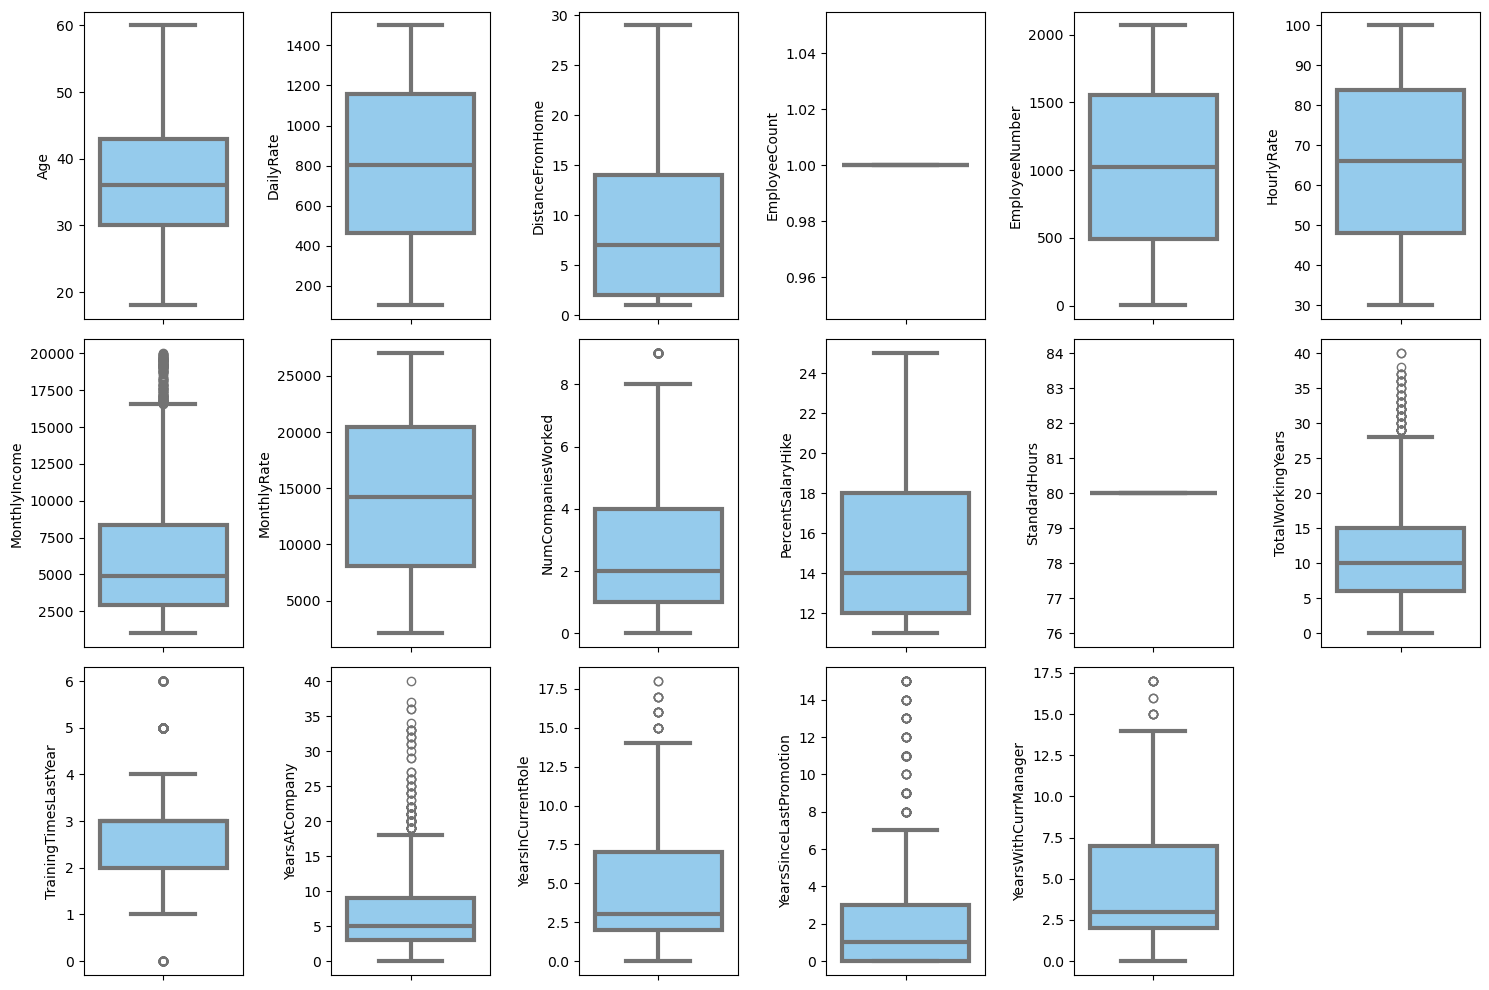

In [25]:
# Boxplot
plt.figure(figsize=(15,10))
for i in range(0, len(nums)):
    plt.subplot(math.ceil(len(nums) / 6), 6,  i+1)
    sns.boxplot(y=df[nums[i]], color='lightskyblue', linewidth=3)
    plt.tight_layout()

Blok kode diatas untuk menampilkan visualisasi box plot untuk setiap kolom numerical yang ada pada dataframe, berdasarkan hasil vsualisasi didapati terdapat beberapa kolom yang memiliki nilai outlier dan ada juga kolom yang memiliki nilai konstan atau hanya 1 unique value

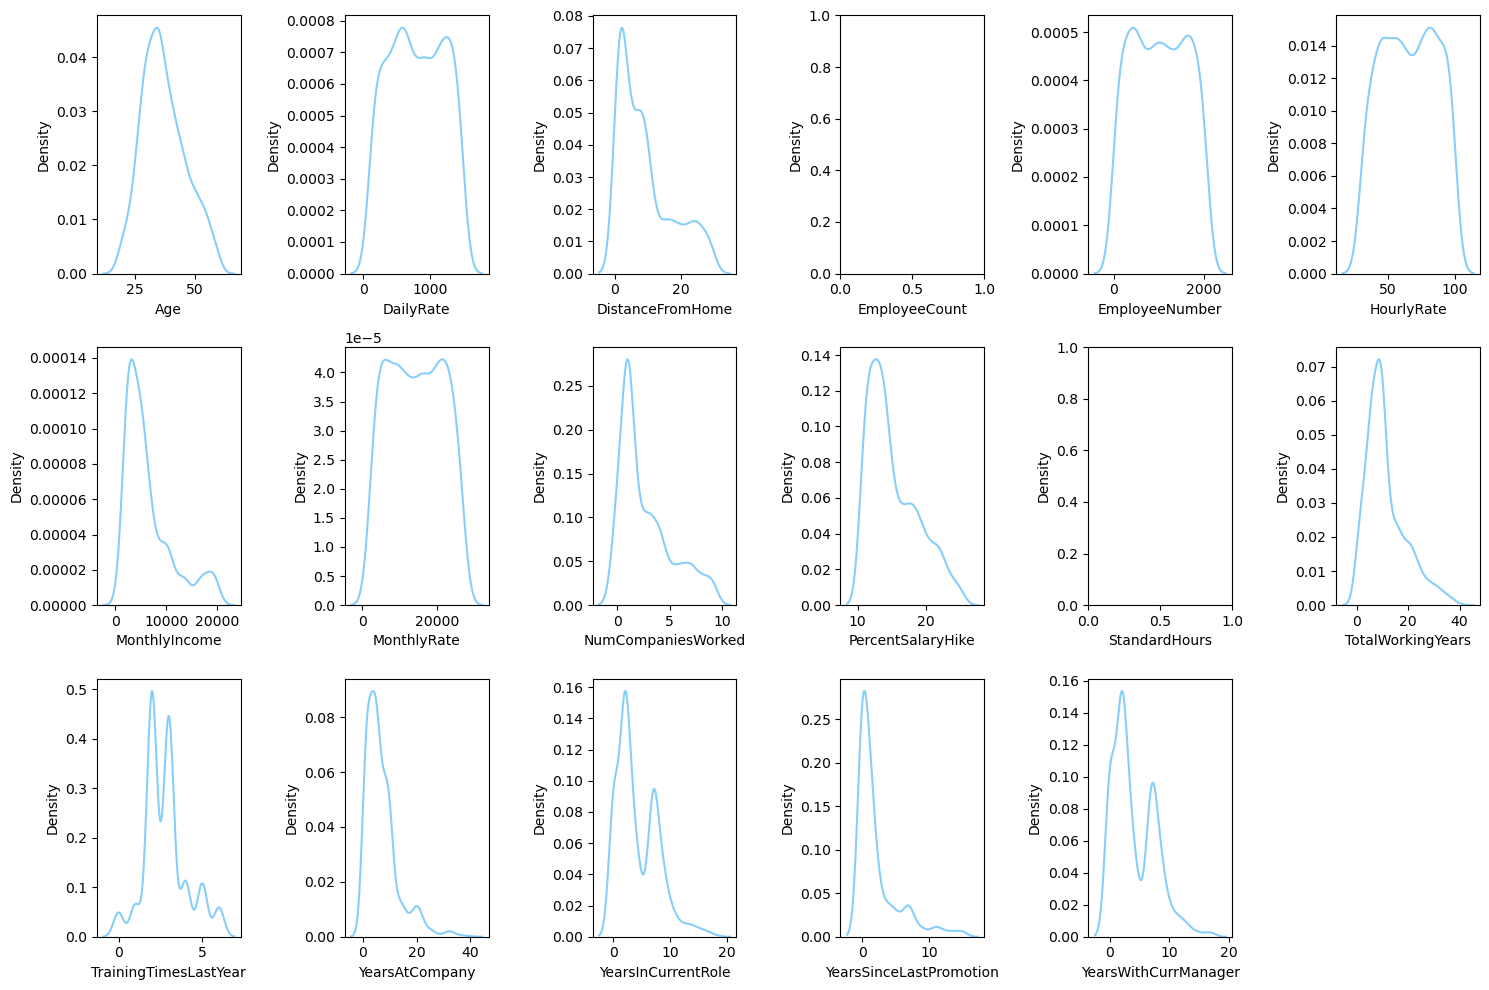

In [26]:
# Distplot
plt.figure(figsize=(15,10))
for i in range(0, len(nums)):
    plt.subplot(math.ceil(len(nums) / 6), 6,  i+1)
    sns.kdeplot(x=df[nums[i]], color='lightskyblue')
    plt.xlabel(nums[i])
    plt.tight_layout()

Block kode diatas digunakan untuk menampilkan visualisasi kdeplot, untuk mem-visualisasikan distribusi data setiap kolom numerikal pada dataframe. didapati bahwa beberapa kolom ada yang memiliki sebaran dara multimodal, sebaran normal(bell curve), serta Right Skewed atau miring kanan. 

#### Categorical Data

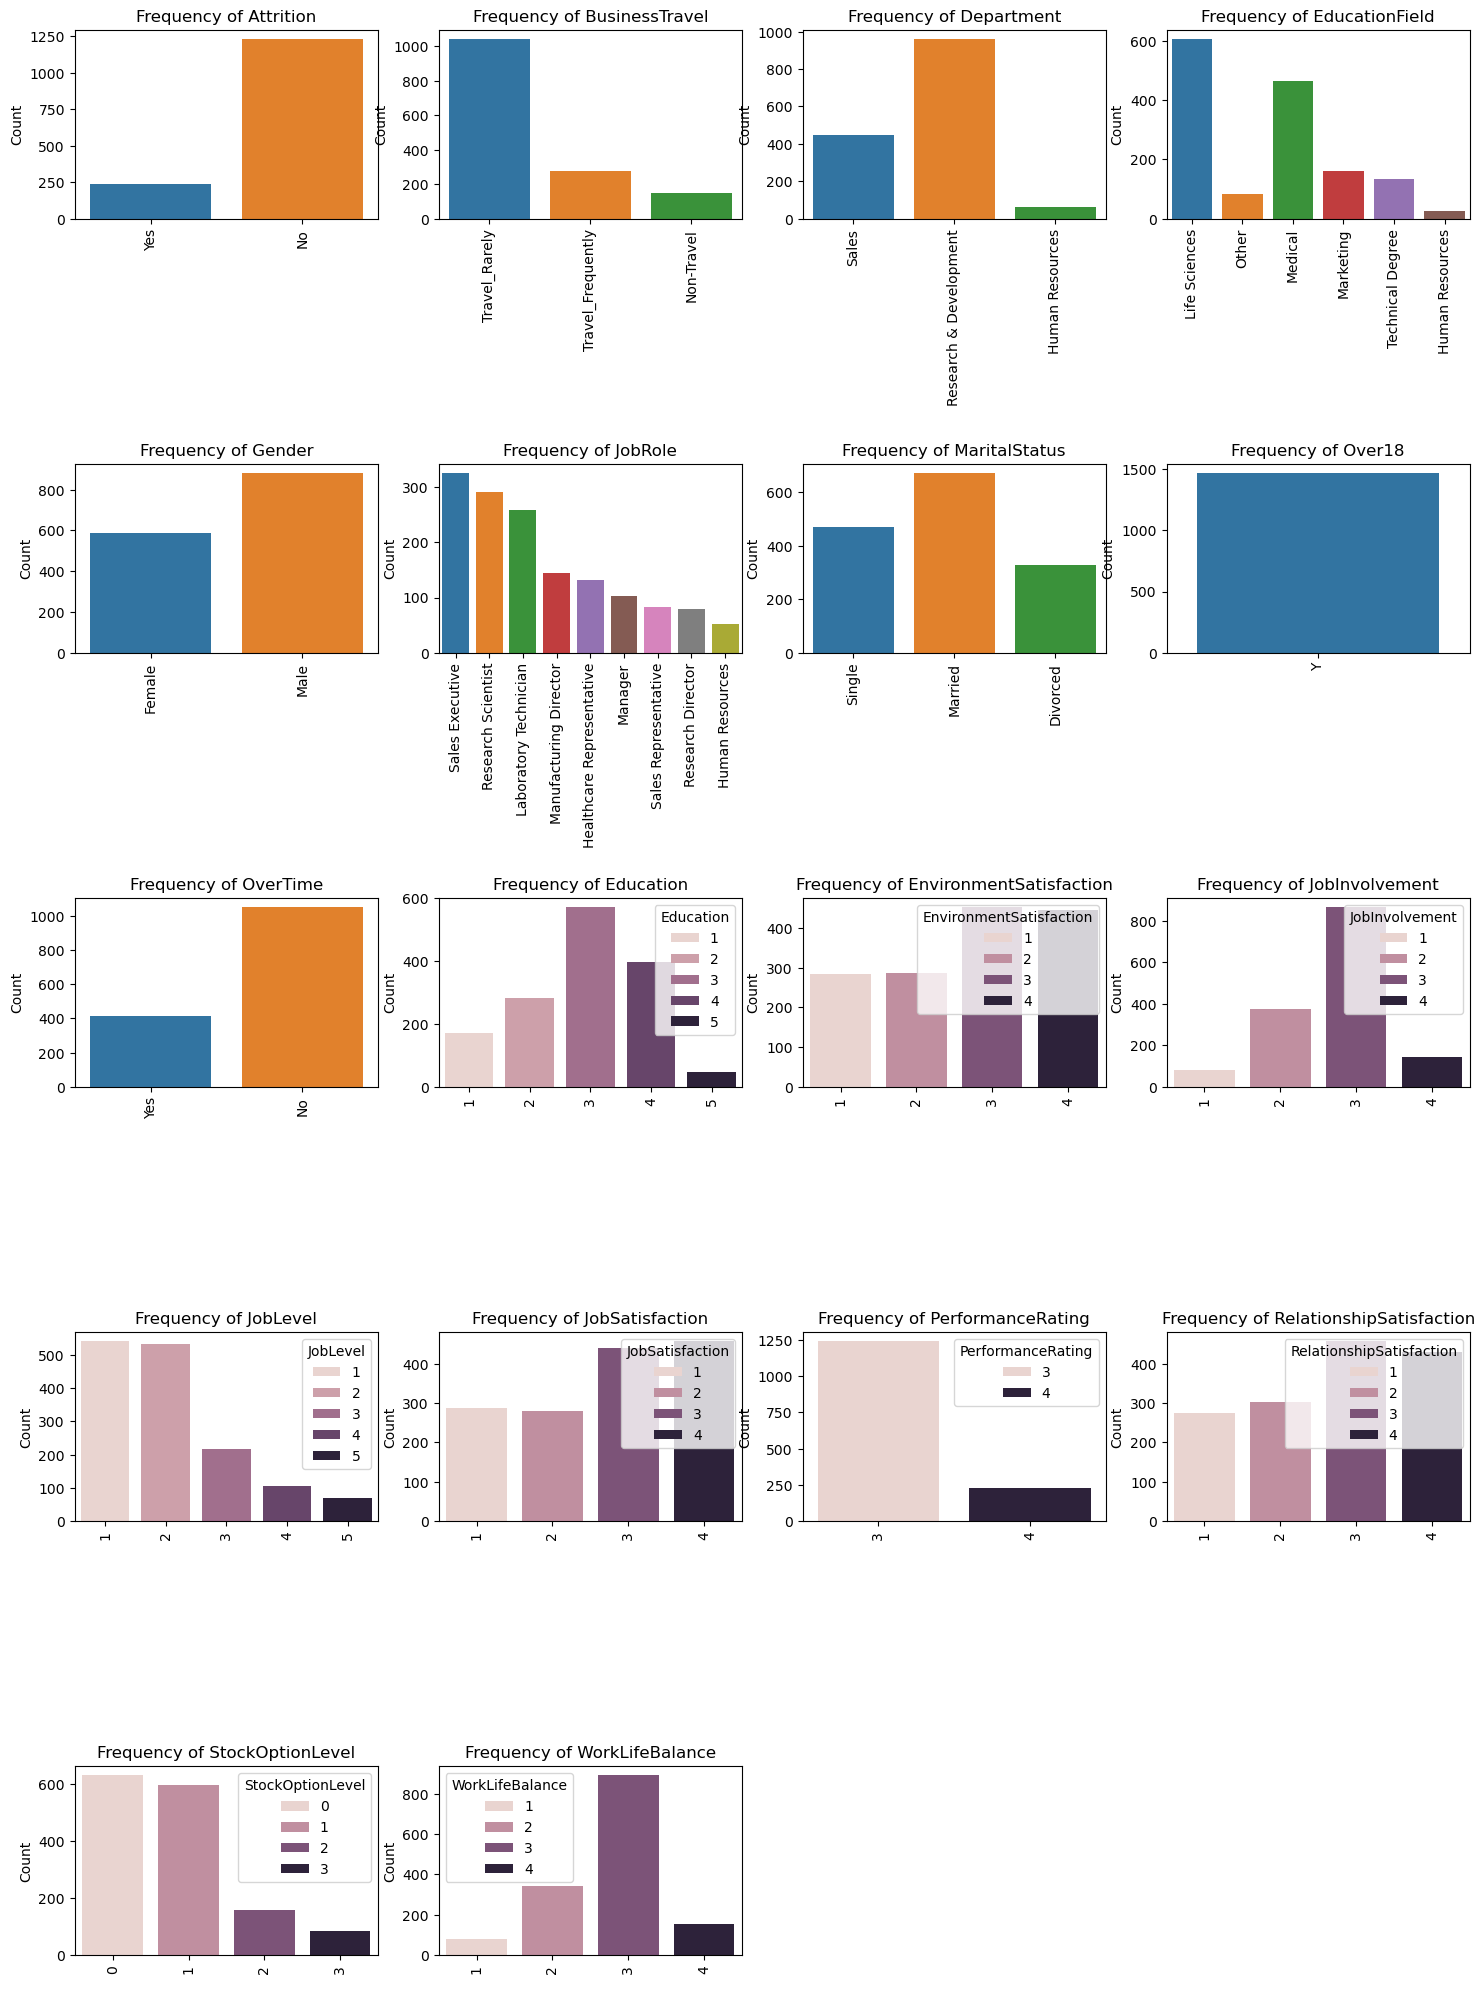

In [27]:
# Bar plots for categorical variables
plt.figure(figsize=(18, 25))
plt.subplots_adjust(hspace=1.3)
for i, col in enumerate(cats):
    plt.subplot(math.ceil(len(cats) / 4), 4, i + 1)
    sns.countplot(x=col, data=df, hue=col)
    plt.title(f"Frequency of {col}")
    plt.xlabel(' ')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.tight_layout

Blok kode diatas untuk menampilkan nilai frekuensi setiap data kategorikal pada dataframe dalam visualisasi bar plot. didapati bahwa setiap data kategorikal memiliki nilai frekuensi dari unique value yang berbeda-beda, juga ditemukan adanya data ordinal 

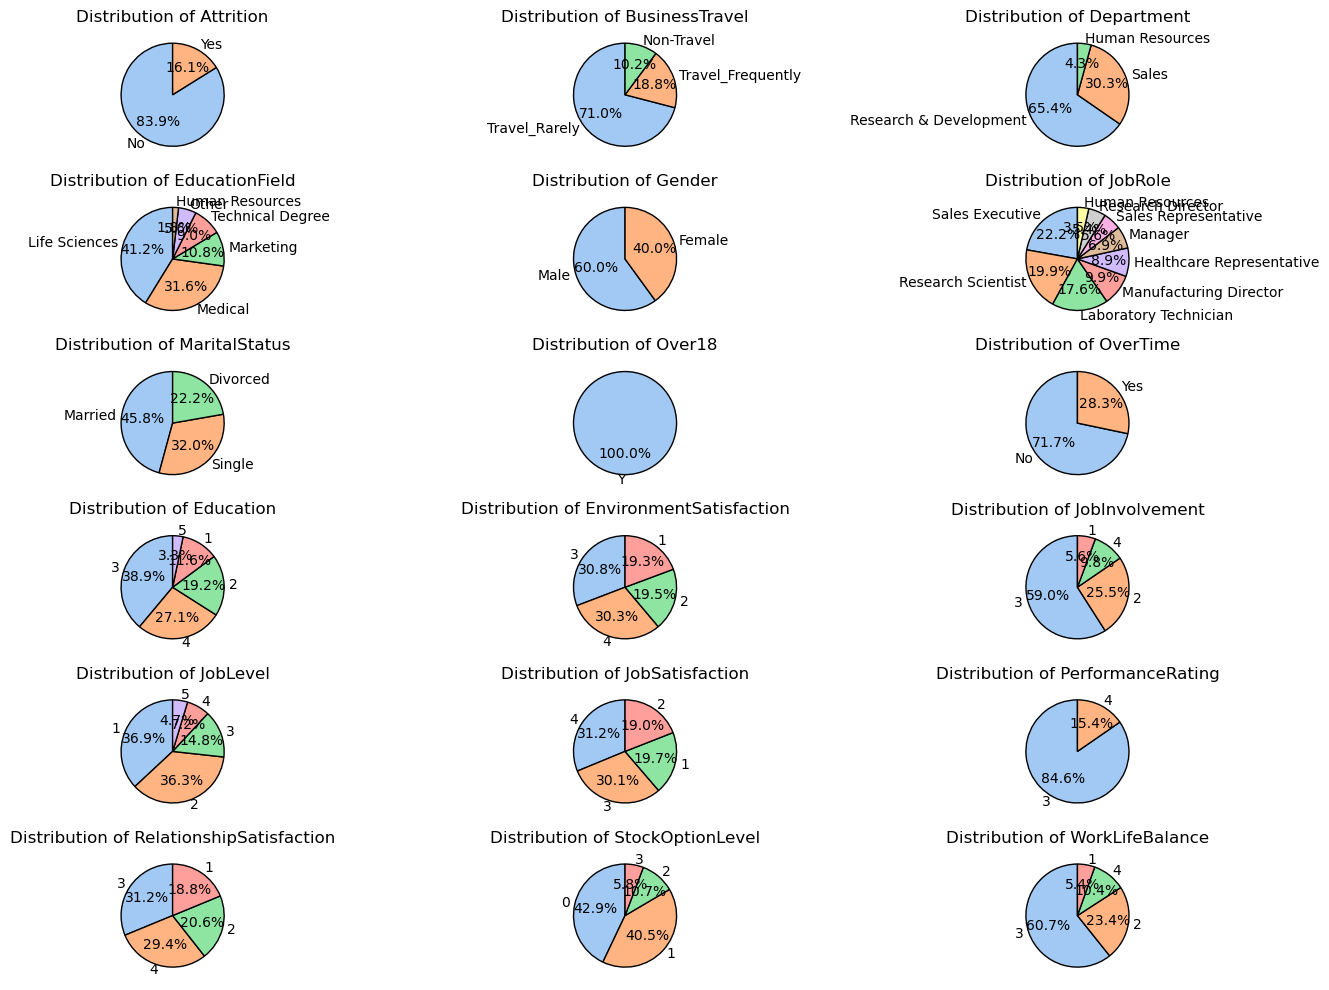

In [28]:
# Pie charts for categorical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(cats):
    plt.subplot(math.ceil(len(cats) / 3), 3, i + 1)
    df[col].value_counts().plot(
        kind='pie', 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('pastel'),
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title(f"Distribution of {col}")
    plt.ylabel('')
    plt.tight_layout()


Blok kode diatas digunakan untuk mem-visualisasikan distribusi nilai pada data kategorikal dalam bentuk piechart untuk melihatnya dalam ratio sebaran data, Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

- Cek distribusi kategorikal yang melebihi lebih dari 4 unique value

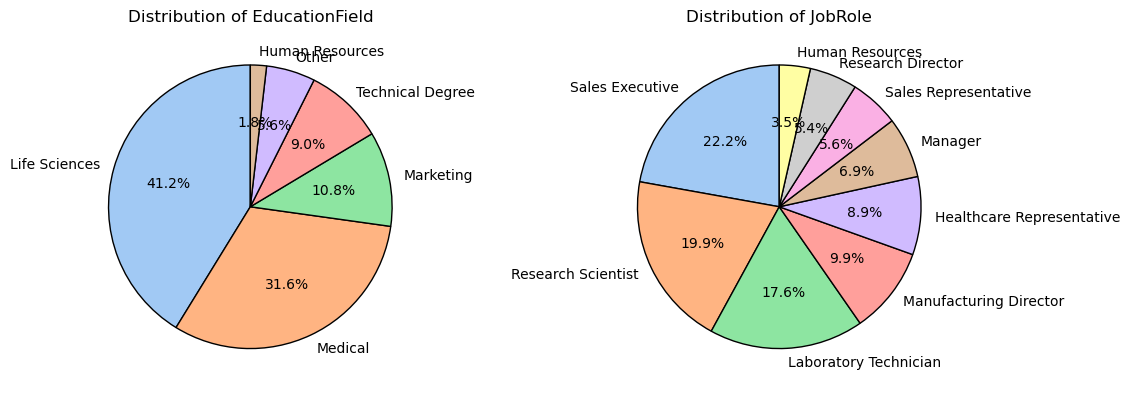

In [23]:
# Pie charts for categorical variables that has more that 4 value
more_that_4_cat = ['EducationField', 'JobRole']
plt.figure(figsize=(15, 10))
for i, col in enumerate(more_that_4_cat):
    plt.subplot(math.ceil(len(more_that_4_cat) / 3), 3, i + 1)
    df[col].value_counts().plot(
        kind='pie', 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('pastel'),
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title(f"Distribution of {col}")
    plt.ylabel('')
    plt.tight_layout()

Blok kode diatas merupakan Visualisasi dua pi chart diatas untuk lebih menerangkan hasil visualisasi pada data kategorikal yang memiliki unique value lebih dari 4, agar lebih terlihat jelas

- **Observasi Univariate Analysis:**
   - **Outlier Detection:**  
     Beberapa kolom numerik menunjukkan keberadaan outlier, seperti:  
     `MonthlyIncome`, `NumCompaniesWorked`, `PerformanceRating`, `StockOptionLevel`, `TotalWorkingYears`, `WorkLifeBalance`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, dan `YearsWithCurrManager`.
   - **Distribusi Positively Skewed:**  
     Beberapa kolom numerik, seperti `MonthlyIncome`, menunjukkan distribusi yang miring ke kanan (positively skewed).
   - **Skewness dari Data Numerik:**  
     Perbedaan yang besar antara mean dan median pada kolom seperti `MonthlyIncome` menunjukkan distribusi data yang tidak simetris.
   - **Kolom dengan Nilai Konstan:**  
     Kolom `StandardHours` dan `Over18` hanya memiliki satu nilai unik dan dapat dipertimbangkan untuk di-drop karena tidak memberikan informasi variatif.
   - **Frekuensi Data Kategorikal:**  
     Beberapa variabel kategorikal menunjukkan distribusi yang tidak merata, seperti `Attrition` yang lebih dominan pada satu kategori dibandingkan lainnya.

### Bivariate

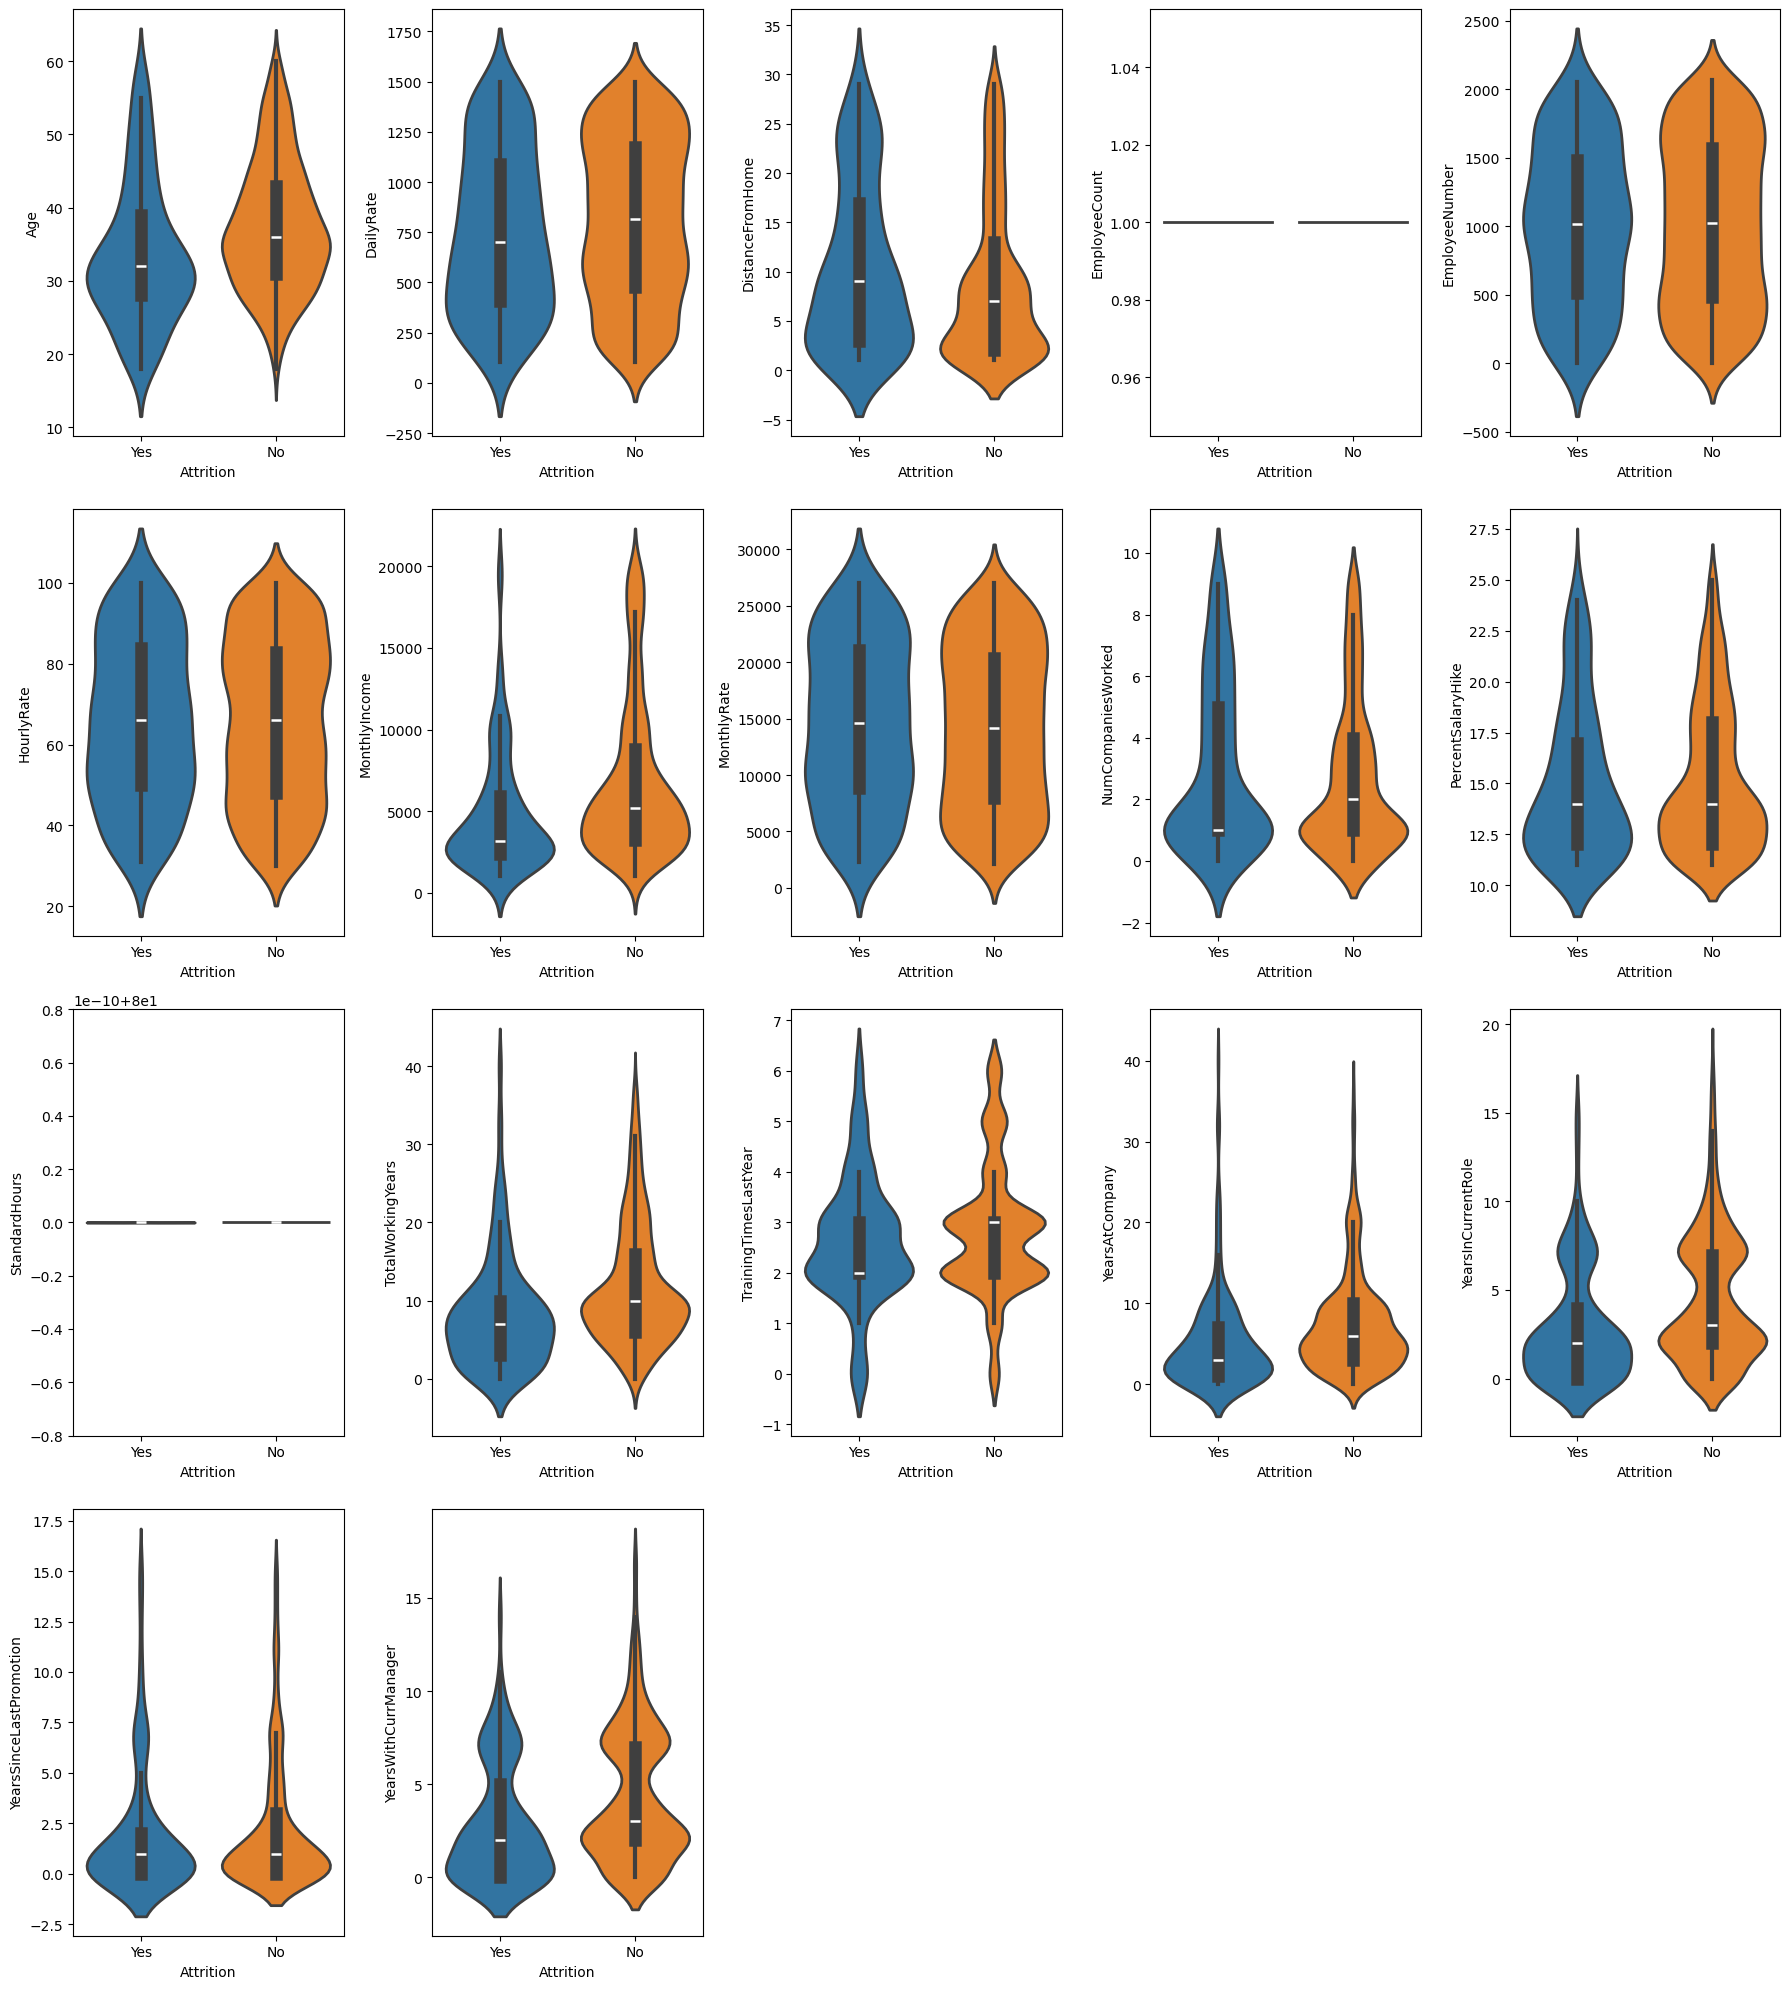

In [16]:
plt.figure(figsize=(18, 20))
for i in range (0, len(nums)):
    plt.subplot(math.ceil(len(nums)/5), 5, i+1)
    sns.violinplot(data=df, y=nums[i], x='Attrition', linewidth=2, orient='v', hue='Attrition')
    plt.tight_layout()

Blok kode diatas ditujukan untuk melakukan visualisasi violin plot antara setiap kolom numerikal terhadap attrtion karyawan

- **Observasi Bivariate Analysis:**
   - **Kecenderungan pada Kolom Numerik:**  
     Kolom seperti `DistanceFromHome`, `MonthlyIncome`, dan `TotalWorkingYears` memiliki perbedaan pola distribusi berdasarkan nilai target `Attrition`.

### Multivariate

- hapus kolom yg memberikan gap agar visualisasi lebih baik

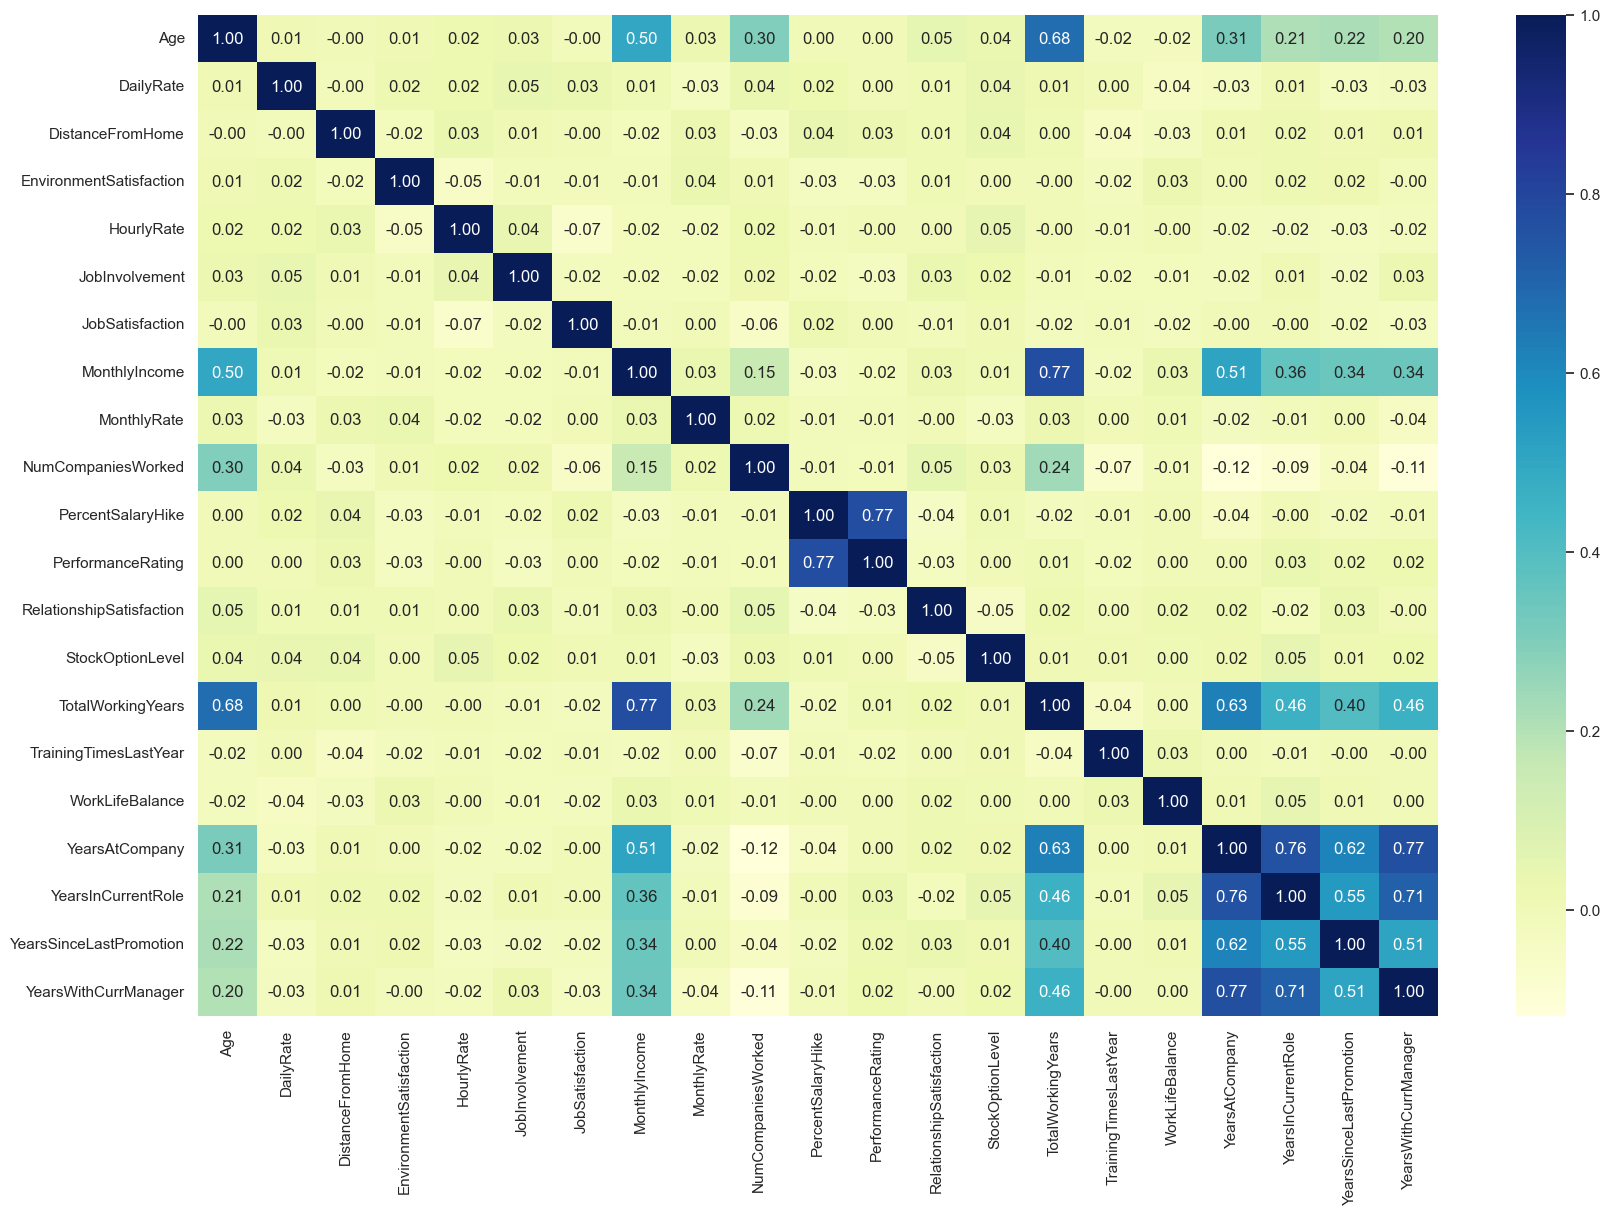

In [112]:
#heatmap
corr_data = df[['Age', 'DailyRate','DistanceFromHome',
       'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
plt.figure(figsize=(20,13))
sns.heatmap(corr_data.corr(numeric_only=True), cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

Blok kode diatas dibuat untuk memvisualisasikan nilai korelasi setiap kolom dalam bentuk heatmap

- **Observasi Multivariate Analysis:**
   - **Multicollinearity Antar Fitur:**  
     Terdapat korelasi tinggi antara beberapa fitur, yang menunjukkan adanya multicollinearity: 
       - `TotalWorkingYears` dan `Age`
       - `TotalWorkingYears` dan `MonthlyIncome`  
       - `YearsInCurrentRole` dan `YearsAtCompany`  
       - `YearsWithCurrManager` dan `YearsAtCompany`  
       - `YearsWithCurrManager` dan `YearsInCurrentRole`  
     Salah satu dari pasangan fitur ini dapat dipertimbangkan untuk di-drop guna mengurangi redundansi data.
   - **Korelasi Signifikan:**  
     Korelasi cukup tinggi ditemukan antar fitur tertentu, seperti antara `PerformanceRating` dan `PercentSalaryHike`. Namun, korelasi ini belum cukup tinggi untuk secara otomatis menghapus salah satu dari fitur tersebut.

- **notes untuk Data Preprocessing:**
   - Lakukan transformasi log atau scaling pada kolom dengan distribusi positively skewed seperti `MonthlyIncome` untuk menstabilkan variansi.
   - Pertimbangkan untuk menghapus outlier pada kolom dengan distribusi ekstrim, terutama jika pengaruhnya besar terhadap analisis atau model.
   - Hilangkan kolom yang tidak informatif seperti `StandardHours` dan `Over18`.
   - Tangani multicollinearity dengan memilih salah satu kolom dari pasangan fitur yang berkorelasi tinggi.


# Explanatory Data Analysis

## Attrition by Monthly Income

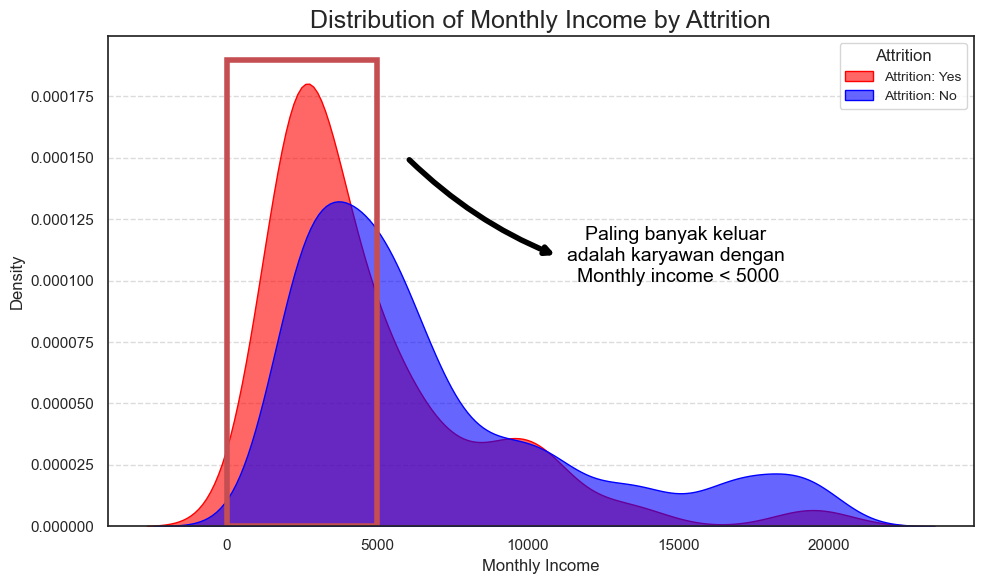

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Attrition'] == 'Yes'], x='MonthlyIncome', fill=True, label='Attrition: Yes', color='red', alpha=0.6)
sns.kdeplot(data=df[df['Attrition'] == 'No'], x='MonthlyIncome', fill=True, label='Attrition: No', color='blue', alpha=0.6)
plt.title('Distribution of Monthly Income by Attrition', fontsize=18)
plt.xlabel('Monthly Income', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Attrition', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

rect = patches.Rectangle((0, 0), 5000, 0.00019, linewidth=4, edgecolor='r', facecolor='none', alpha=1)
plt.gca().add_patch(rect)

# Add a curve arrow and text annotation
xy_start = (6000, 0.00015)  # Starting point of the arrow (adjusted slightly)
xy_end = (1000, 0.0001) 
plt.annotate('', xy=(6000, 0.00015), xytext=(11000, 0.00011), 
             arrowprops=dict(facecolor='black', lw=4,  edgecolor='black',
                             arrowstyle='<-', connectionstyle="arc3,rad=-0.1"))

plt.text(15000, 0.00011, "Paling banyak keluar \nadalah karyawan dengan \nMonthly income < 5000", 
         fontsize=14, color='black', ha='center', va='center')

plt.tight_layout()
plt.show()

Blok kode diatas digunakan untuk melakukan visualisasi sebaran data pada motnhlyIncome terhadap attrition karyawan
- Berdasarkan Visualisasi didapati bahwa karyawan yang memiliki penghasilan perbulan (Monthly Income) dibawah 5000 paling banyak memutuskan untuk keluar dari perusahaan

## Attrition by Job Level

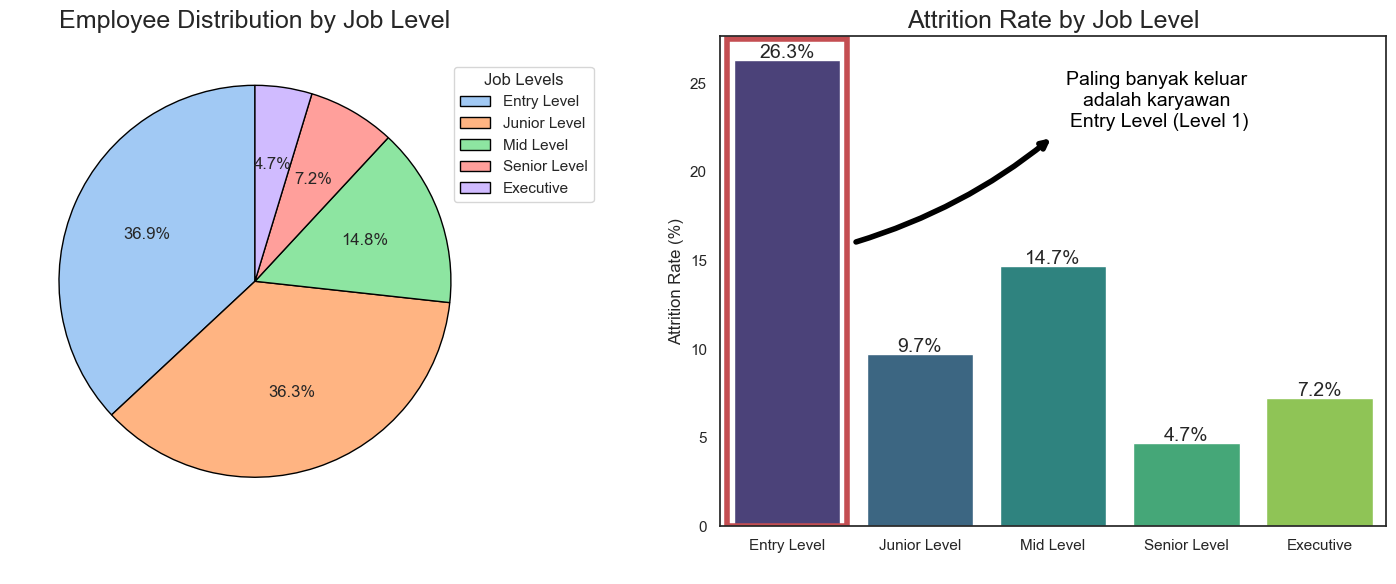

In [21]:
# Map numerical job levels to descriptive labels for display
job_level_labels = {
    1: 'Entry Level',
    2: 'Junior Level',
    3: 'Mid Level',
    4: 'Senior Level',
    5: 'Executive'
}

# Calculate distribution of employees by job level
job_level_distribution = df['JobLevel'].value_counts()

# Calculate attrition rate by job level
attrition_rate = df[df['Attrition'] == 'Yes']['JobLevel'].value_counts() / df['JobLevel'].value_counts() * 100

# Plot side-by-side visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart: Employee distribution by job level
wedges, texts, autotexts = axes[0].pie(
    job_level_distribution, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette('pastel'), 
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('Employee Distribution by Job Level', fontsize=18)

# Add legend for pie chart
axes[0].legend(wedges, [job_level_labels[level] for level in job_level_distribution.index], 
               title="Job Levels", loc="center left", bbox_to_anchor=(0.89, 0.3, 0.95, 1))

# Bar chart: Attrition rate by job level
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, ax=axes[1], palette='viridis')
axes[1].set_title('Attrition Rate by Job Level', fontsize=18)
axes[1].set_xlabel(' ', fontsize=12)
axes[1].set_ylabel('Attrition Rate (%)', fontsize=12)
axes[1].set_xticklabels([job_level_labels[level] for level in attrition_rate.index])

rect = patches.Rectangle((-0.45, 0), 0.9, 27.5, linewidth=4, edgecolor='r', facecolor='none', alpha=1)
axes[1].add_patch(rect)

axes[1].annotate('', xy=(0.5, 16), xytext=(2, 22), 
             arrowprops=dict(facecolor='black', lw=4,  edgecolor='black',
                             arrowstyle='<-', connectionstyle="arc3,rad=-0.1"))

axes[1].text(2.8, 24, "Paling banyak keluar \nadalah karyawan \nEntry Level (Level 1)", 
         fontsize=14, color='black', ha='center', va='center')

# Add values on top of the bars
for i, rate in enumerate(attrition_rate.values):
    axes[1].text(i, rate + 0.1, f'{rate:.1f}%', ha='center', fontsize=14)

plt.tight_layout()
plt.show()

Blok kode diatas digunakan untuk melakukan visualisasi terhadap sebaran job level karyawan dalam pie chart serta nilai kemunkinan attrition pada kolom JobLevel dalam bentuk bar 

Berdasarkan Visaualisasi diatas didapati,
- distibusi karyawan paling banyak didominasi karyawan 'Entry Level" (Level 1) dan Karyawan "Junior Level" (Level 2)
- Karyawan "Entry Level" memiliki kemunkinan attretion paling besar sebesar 26.3%, diikuti dengan karyawan "Mid Level" sebesar 14.7%

## Attrition by Work Life Balance and Overtime

In [22]:
# Recalculate Attrition Rate by Work-Life Balance
attrition_rate_worklife = df[df['Attrition'] == 'Yes'].groupby('WorkLifeBalance').size() / df.groupby('WorkLifeBalance').size() * 100
attrition_rate_worklife = attrition_rate_worklife.reset_index(name='count')
attrition_rate_worklife = attrition_rate_worklife.sort_values(by='WorkLifeBalance').reset_index(drop=True)

Blok kode diatas digunakan untuk membuat agregrasi dan menghitung tingkat attrition karyawan terhadap kolom worklifebalance, Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

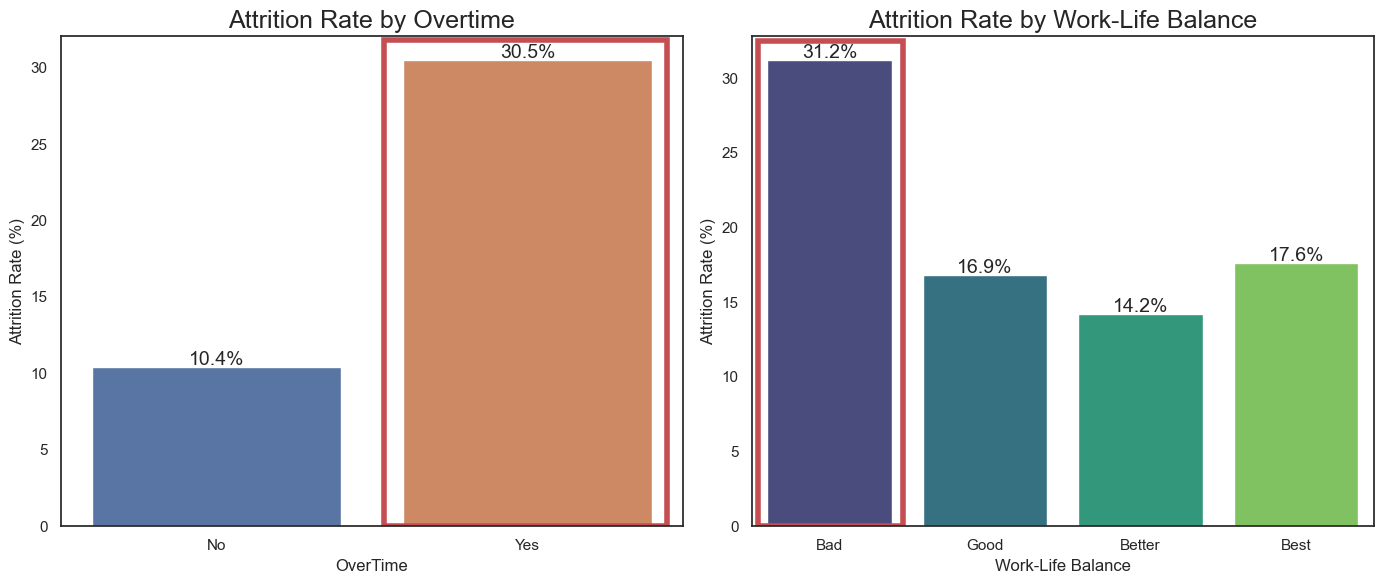

In [24]:
# Calculate attrition rate by overtime
attrition_rate_overtime = df[df['Attrition'] == 'Yes']['OverTime'].value_counts() / df['OverTime'].value_counts() * 100

# Calculate attrition rate by work-life balance
attrition_rate_worklife = df[df['Attrition'] == 'Yes'].groupby('WorkLifeBalance').size() / df.groupby('WorkLifeBalance').size() * 100
attrition_rate_worklife = attrition_rate_worklife.reset_index(name='count')
attrition_rate_worklife = attrition_rate_worklife.sort_values(by='WorkLifeBalance').reset_index(drop=True)

# Map numerical work-life balance levels to descriptive labels
worklife_balance_labels = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}

# Create side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart: Attrition rate by overtime
sns.barplot(x=attrition_rate_overtime.index, y=attrition_rate_overtime.values, ax=axes[0], hue=attrition_rate_overtime.index)
axes[0].set_title('Attrition Rate by Overtime', fontsize=18)
axes[0].set_xlabel('OverTime', fontsize=12)
axes[0].set_ylabel('Attrition Rate (%)', fontsize=12)
axes[0].set_xticklabels(['No', 'Yes'])
rect = patches.Rectangle((0.54, 0), 0.91, 31.8, linewidth=4, edgecolor='r', facecolor='none', alpha=1)
axes[0].add_patch(rect)

# Add values on top of the bars
for i, rate in enumerate(attrition_rate_overtime.values):
    axes[0].text(i, rate +0.11, f'{rate:.1f}%', ha='center', fontsize=14)

# Bar chart: Attrition rate by work-life balance
sns.barplot(data=attrition_rate_worklife, x='WorkLifeBalance', y='count', ax=axes[1], palette='viridis')
axes[1].set_title('Attrition Rate by Work-Life Balance', fontsize=18)
axes[1].set_xlabel('Work-Life Balance', fontsize=12)
axes[1].set_ylabel('Attrition Rate (%)', fontsize=12)
axes[1].set_xticklabels([worklife_balance_labels[level] for level in attrition_rate_worklife['WorkLifeBalance']])
rect = patches.Rectangle((-0.46, 0), 0.93, 32.5, linewidth=4, edgecolor='r', facecolor='none', alpha=1)
axes[1].add_patch(rect)

# Add values on top of the bars
for i, rate in enumerate(attrition_rate_worklife['count']):
    axes[1].text(i, rate + 0.11, f'{rate:.1f}%', ha='center', fontsize=14)

plt.tight_layout()
plt.show()


Blok kode diatas digunakan untuk menghitung agregasi tingkat attrition karyawan terhadap kolom overtime, serta memviasualisasikan tingkat attrition karyawan terhadap Overtime dan WorkLifeBalance

Berdasarkan visualisasi, didapati:
- Karyawan yang melakukan overtime memiliki nilai attrition rate lebih besar dibandingkan dengan karyawan yang tidak melakukan overtime
- Sejalan dengan Attrition rate by overtime, karyawan yang memiliki Work-Life Balance yang buruk memiliki nilai Attrition Rate paling tinggi

## Attrition by Stock Option Level

In [80]:
# Recalculate Attrition Rate by Work-Life Balance
attrition_rate_stock = df[df['Attrition'] == 'Yes'].groupby('StockOptionLevel').size() / df.groupby('StockOptionLevel').size() * 100
attrition_rate_stock = attrition_rate_stock.reset_index(name='count')
attrition_rate_stock = attrition_rate_stock.sort_values(by='StockOptionLevel').reset_index(drop=True)

Blok kode diatas dgunakan untuk melakukan agregasi nilai tingkat attrition karyawan terhadap kolom StockOptionLevel, Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

In [81]:
attrition_rate_stock

,StockOptionLevel,count
0,0,24.405705
1,1,9.395973
2,2,7.594937
3,3,17.647059


Blok kode diatas digunakan untuk menampilkan hasil agregasi, Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

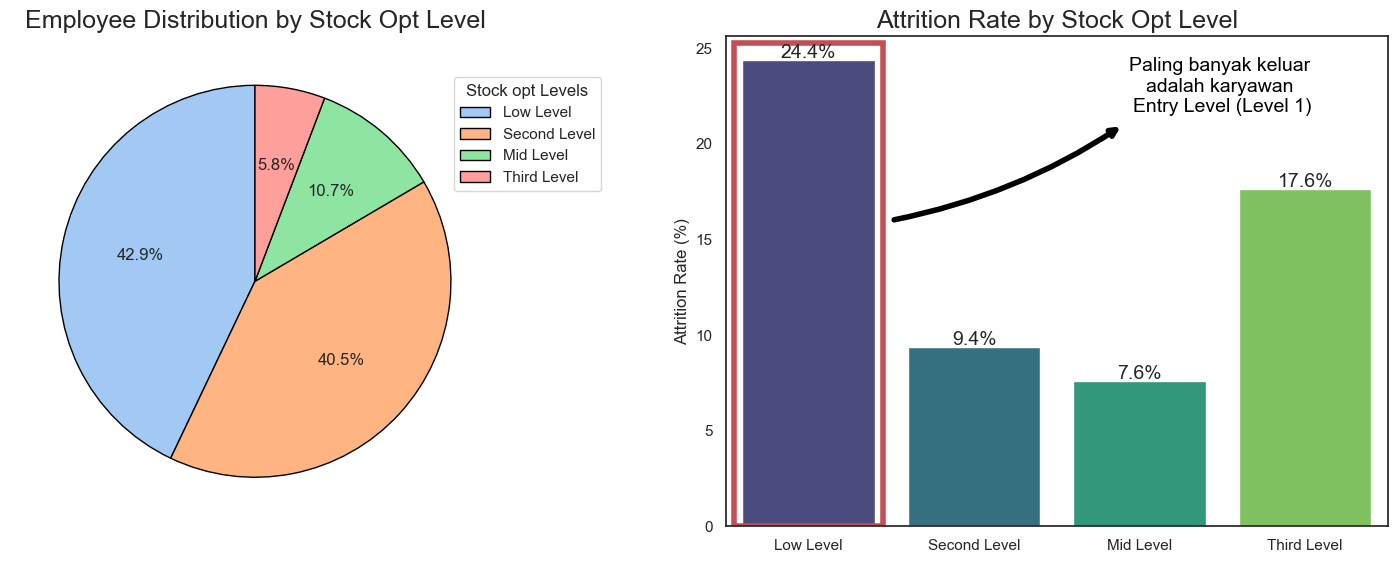

In [95]:
# Map numerical job levels to descriptive labels for display
Stock_level_labels = {
    0: 'Low Level',
    1: 'Second Level',
    2: 'Mid Level',
    3: 'Third Level',
    4: 'Executive'
}

# Calculate distribution of employees by job level
Stock_level_distribution = df['StockOptionLevel'].value_counts()

# Calculate attrition rate by job level
attrition_rate = df[df['Attrition'] == 'Yes']['StockOptionLevel'].value_counts() / df['StockOptionLevel'].value_counts() * 100

# Plot side-by-side visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart: Employee distribution by job level
wedges, texts, autotexts = axes[0].pie(
    Stock_level_distribution, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette('pastel'), 
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('Employee Distribution by Stock Opt Level', fontsize=18)

# Add legend for pie chart
axes[0].legend(wedges, [Stock_level_labels[level] for level in Stock_level_distribution.index], 
               title="Stock opt Levels", loc="center left", bbox_to_anchor=(0.89, 0.3, 0.95, 1))

# Bar chart: Attrition rate by job level
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, ax=axes[1], palette='viridis')
axes[1].set_title('Attrition Rate by Stock Opt Level', fontsize=18)
axes[1].set_xlabel(' ', fontsize=12)
axes[1].set_ylabel('Attrition Rate (%)', fontsize=12)
axes[1].set_xticklabels([Stock_level_labels[level] for level in attrition_rate.index])

rect = patches.Rectangle((-0.45, 0), 0.9, 25.3, linewidth=4, edgecolor='r', facecolor='none', alpha=1)
axes[1].add_patch(rect)

axes[1].annotate('', xy=(0.5, 16), xytext=(1.9, 21), 
             arrowprops=dict(facecolor='black', lw=4,  edgecolor='black',
                             arrowstyle='<-', connectionstyle="arc3,rad=-0.1"))

axes[1].text(2.5, 23, "Paling banyak keluar \nadalah karyawan \nEntry Level (Level 1)", 
         fontsize=14, color='black', ha='center', va='center')

# Add values on top of the bars
for i, rate in enumerate(attrition_rate.values):
    axes[1].text(i, rate + 0.1, f'{rate:.1f}%', ha='center', fontsize=14)

plt.tight_layout()
plt.show()

Blok kode diatas digunakan untuk melakukan visualisasi terhadap sebaran StockOptionlevel karyawan dalam pie chart serta nilai kemunkinan attrition pada kolom StockOptionLevel dalam bentuk bar,

- Berdasarkan Visualisasi diatas didapati bawha, semakin rendah Employee Stock Option Level (ESO) maka akan semakin tinggi kemunkinannya untuk attrition

- **Summary of Observations:**
    - **Income**: Lower income is linked to higher attrition.
    - **Job Levels**: Higher job levels experience lower attrition.
    - **Work-Life Balance**: Poor Work-Life Balance are strongly associated with attrition.
    - **Overtime**: Excessive overtime is a key driver of attrition.
    - **Stock Option Level**: Lower Stock Option Level is linked to high attrition

# Data Preprocessing

### Handle Missing, Null, Duplicate Values

- Handle Null Values: tidak dilakukan karena tidak ditemukan nilai null
- Handle Missing Values: tidak dilakukan karena tidak ditemukan nilai yang hilang
- Handle Duplcate: Tidak dilakukan karena tidak ditemukan data yang duplikat

### Feature Selection

In [27]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Blok kode diatas untuk menampilkan nilai jumlah unique value pada setiap koolom dataframe, unutk memastikan mana kolom yang hanya memiliki 1 value, Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

**Alasan Drop Feature:** 
- **`EmployeeNumber`**: Hanya merupakan pengenal unik untuk setiap karyawan, tidak relevan untuk analisis atau prediksi.  
- **`EmployeeCount`**: Semua baris memiliki nilai yang sama, sehingga tidak memberikan informasi yang berarti.  
- **`Over18`**: Semua baris memiliki nilai "Yes", sehingga tidak memberikan variasi data.  
- **`StandardHours`**: Semua baris memiliki nilai yang sama (40 jam), sehingga tidak memberikan informasi tambahan.  
- **`PerformanceRating`**: Hampir semua karyawan memiliki nilai yang sama hanya [3,4], sehingga fitur ini kurang bervariasi untuk digunakan dalam model prediksi.  

Dengan menghapus fitur-fitur ini, kita dapat menyederhanakan dataset tanpa kehilangan informasi yang penting.

In [28]:
df_selected = df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours', 'PerformanceRating'], axis=1)

Blok kode diatas dalah membuat dataframe dengan kolom yng sudah diseleksi, Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

### Feature Encoding

In [29]:
cats_select = df_selected.select_dtypes('object')
cats_select.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


Blok kode diatas sekali lagi dilakukan untuk melihat kolom kategorikal yang nantinya akan dilakukan feature encoding, Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

In [30]:
for col in cats_select:
    print(f'value counts of column')
    print(df_selected[col].value_counts())
    print('----------------------------', '\n')

value counts of column
Attrition
No     1233
Yes     237
Name: count, dtype: int64
---------------------------- 

value counts of column
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
---------------------------- 

value counts of column
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
---------------------------- 

value counts of column
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
---------------------------- 

value counts of column
Gender
Male      882
Female    588
Name: count, dtype: int64
---------------------------- 

value counts of column
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Repr

Blok kode diatas untuk menampilkan (sekali lagi), nilai unique value dan umlahnya pada kolom kategorikal, dan memastikan kolom mana saja yang dilakukan feature encoding, Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

**Feature Encoding** yang dilakukan, pada kolom `Attrition`, `BusinessTravel`, `Gender`, `MaritalStatus`, `OverTime`, `Department`, `EducationField`, `JobRole`. Encoding dilakukan menggunakan metode label encoding

In [31]:
label=LabelEncoder()
df_selected['Attrition'] = label.fit_transform(df_selected['Attrition'])
df_selected['OverTime'] = label.fit_transform(df_selected['OverTime'])
df_selected['BusinessTravel']=label.fit_transform(df_selected['BusinessTravel'])
df_selected['Department']=label.fit_transform(df_selected['Department'])
df_selected['EducationField']=label.fit_transform(df_selected['EducationField'])
df_selected['Gender']=label.fit_transform(df_selected['Gender'])
df_selected['JobRole']=label.fit_transform(df_selected['JobRole'])
df_selected['MaritalStatus']=label.fit_transform(df_selected['MaritalStatus'])

print(df_selected.dtypes.value_counts())
df_selected.head()

int64    22
int32     8
Name: count, dtype: int64


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,11,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,15,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,11,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,12,4,1,6,3,3,2,2,2,2


Blok kode diatas ditujukan untuk melakukan feature encoding menggunakan metode label encoder untuk setiap kolom kategorikal yang dipilih, Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

In [32]:
for col in cats_select:
    print(f'value counts of column')
    print(df_selected[col].value_counts())
    print('----------------------------', '\n')

value counts of column
Attrition
0    1233
1     237
Name: count, dtype: int64
---------------------------- 

value counts of column
BusinessTravel
2    1043
1     277
0     150
Name: count, dtype: int64
---------------------------- 

value counts of column
Department
1    961
2    446
0     63
Name: count, dtype: int64
---------------------------- 

value counts of column
EducationField
1    606
3    464
2    159
5    132
4     82
0     27
Name: count, dtype: int64
---------------------------- 

value counts of column
Gender
1    882
0    588
Name: count, dtype: int64
---------------------------- 

value counts of column
JobRole
7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: count, dtype: int64
---------------------------- 

value counts of column
MaritalStatus
1    673
2    470
0    327
Name: count, dtype: int64
---------------------------- 

value counts of column
OverTime
0    1054
1     416
Name: count, dtype: int64
-------------------------

Blok kode diatas untuk melihat hasil label encoder yang sudah dilakukan

- **Label Encoding Mapping**:
1. **Attrition:** 0: No, 1: Yes
2. **BusinessTravel:** 0: Non-Travel, 1: Travel_Rarely, 2: Travel_Frequently
3. **Department:** 0: Sales, 1: Research & Development, 2: Human Resources
4. **EducationField:** 0: Life Sciences, 1: Medical, 2: Technical Degree, 3: Human Resources, 4: Marketing, 5: Other
5. **Gender:** 0: Female, 1: Male
6. **JobRole:** 0: Sales Executive, Sales Representative, 1: Research Scientist, Research Director, 2: Laboratory Technician, Healthcare Representative, 3: Manager, Human Resources, 4: Manufacturing Director
7. **MaritalStatus:** 0: Single, 1: Married, 2: Divorced
8. **OverTime:** 0: No, 1: Yes



### Normalisasi

In [33]:
nums_selected= ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Blok kode diatas (sekali lagi), memastikan kolom numerik dalam dataframe, Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

In [34]:
df_selected[nums_selected].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0
TrainingTimesLastYear,1470.0,2.799320,1.289271,0.0,2.0,3.0,3.00,6.0


Blok kode diatas ditujukan untuk melihat nilai sebaran data numerikal pada dataframe yng sudah melalui feature selection, untuk menentukan jenis normalisasi yang akan dilakukan

- Berdasarkan nilai distribusi data, semuanya merepresentasikan keunikan masing-masing dan masih dalam batas yang normal, sehingga hanya perlu dilakukan normalisasi dengan Min-Max Scaler

In [35]:
scaler = MinMaxScaler()

df_scalled= df_selected.copy()
df_scalled[nums_selected] = scaler.fit_transform(df_scalled[nums_selected])

Blok kode diatas ditujukan untuk membuat scler userta melakukan minmax scaller pada dataframe

In [36]:
df_scalled[nums_selected].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,0.450567,0.217509,0.0,0.285714,0.428571,0.595238,1.0
DailyRate,1470.0,0.501421,0.288840,0.0,0.259843,0.501074,0.755190,1.0
DistanceFromHome,1470.0,0.292590,0.289531,0.0,0.035714,0.214286,0.464286,1.0
HourlyRate,1470.0,0.512731,0.290420,0.0,0.257143,0.514286,0.767857,1.0
MonthlyIncome,1470.0,0.289307,0.247918,0.0,0.100158,0.205898,0.388099,1.0
MonthlyRate,1470.0,0.490629,0.285797,0.0,0.239028,0.487513,0.737503,1.0
NumCompaniesWorked,1470.0,0.299244,0.277557,0.0,0.111111,0.222222,0.444444,1.0
PercentSalaryHike,1470.0,0.300680,0.261424,0.0,0.071429,0.214286,0.500000,1.0
TotalWorkingYears,1470.0,0.281990,0.194520,0.0,0.150000,0.250000,0.375000,1.0
TrainingTimesLastYear,1470.0,0.466553,0.214878,0.0,0.333333,0.500000,0.500000,1.0


Blok kode diatas ditujukan untuk melihat deskripsi statistik terhadap dataframe setelah dilakukan normalisasi data

## Split data: **Data Training & Data Testing**

In [37]:
df_clean = df_scalled.copy()

Blok kode diatas ditujukan untuk melakukan copy dataframe hasil pen-skala-an untuk backup jika terjadi kesalahan dalam proses split data

In [38]:
df_clean.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1,2,0.715820,2,0.000000,2,1,2,0,...,0.000000,1,0,0.200,0.0,1,0.15,0.222222,0.000000,0.294118
1,0.738095,0,1,0.126700,1,0.250000,1,1,3,1,...,0.857143,4,1,0.250,0.5,3,0.25,0.388889,0.066667,0.411765
2,0.452381,1,2,0.909807,1,0.035714,2,4,4,1,...,0.285714,2,0,0.175,0.5,3,0.00,0.000000,0.000000,0.000000
3,0.357143,0,1,0.923407,1,0.071429,4,1,4,0,...,0.000000,3,0,0.200,0.5,3,0.20,0.388889,0.200000,0.000000
4,0.214286,0,2,0.350036,1,0.035714,1,3,1,1,...,0.071429,4,1,0.150,0.5,3,0.05,0.111111,0.133333,0.117647


Blok kode diatas untuk melihat sample data pada dataframe copy, Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

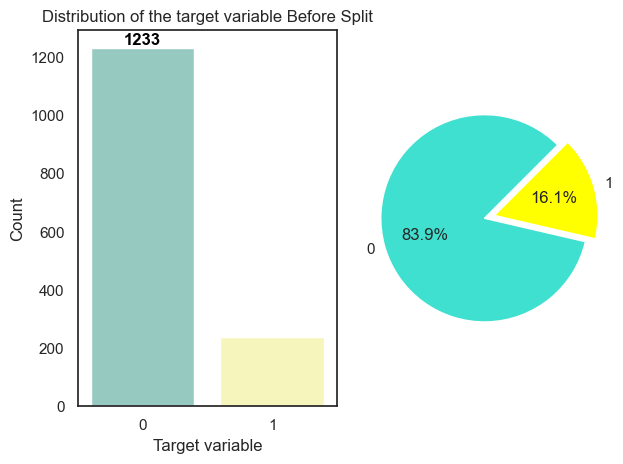

In [39]:
plt.subplot(1,2,1)
ax = sns.countplot(x='Attrition', data=df_clean, palette="Set3")
plt.title('Distribution of the target variable Before Split')
plt.xlabel('Target variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(df_clean.Attrition.value_counts(), labels=df_clean.Attrition.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0, 0.1), colors = ['turquoise', 'yellow'] )
plt.tight_layout()
plt.show()

Blok kode diatas untuk melihat visualisasi distribusi nilai attrion sebelum dilakukan splitting data

In [40]:
y = df_clean['Attrition']
X = df_clean.drop(['Attrition'],axis=1,inplace=False)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=123, stratify = y)

Blok kode diatas ditujukan untuk melakukan splitting data dengan presentase 70 % data Training dan 30% data testing

In [41]:
print(ytrain.value_counts())
print(ytest.value_counts())

print(Xtrain.shape)
print(Xtest.shape)

Attrition
0    863
1    166
Name: count, dtype: int64
Attrition
0    370
1     71
Name: count, dtype: int64
(1029, 29)
(441, 29)


Blok kode diatas ditujukan untuk melihat hasil jumlah data terhadap splitiing data yang dilakukan

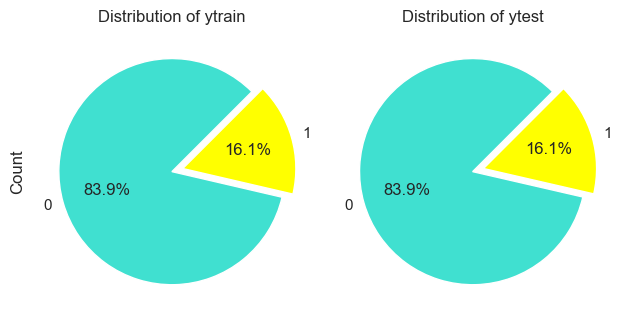

In [42]:
plt.subplot(1,2,1)
plt.pie(ytrain.value_counts(), labels = ytrain.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0, 0.1), colors = ['turquoise', 'yellow'] )
plt.title('Distribution of ytrain')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(ytest.value_counts(), labels = ytest.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0, 0.1), colors = ['turquoise', 'yellow'] )
plt.title('Distribution of ytest')
plt.tight_layout()
plt.show()

Blok kode diatas ditujukan untuk melihat distribusi hasil spliting data pada nilai target

## Handle Imbalance

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1, random_state=42)
Xtrain_smote, ytrain_smote = smote.fit_resample(Xtrain, ytrain)

print('SMOTE')
print(pd.Series(ytrain_smote).value_counts())

SMOTE
Attrition
0    863
1    863
Name: count, dtype: int64


Blok kode diatas ditujukan untuk melakukan handle imbalance terhadap data training dengan metode overdsampling SMOTE

# Modelling & Evaluation

## Train Model

- Siapkan Fungsi untuk evaluasi

In [46]:
def eval_classification(model):
    y_pred = model.predict(Xtest)
    y_pred_train = model.predict(Xtrain_smote)
    y_pred_proba = model.predict_proba(Xtest)
    y_pred_proba_train = model.predict_proba(Xtrain_smote)

    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, y_pred))
    
    print("\nCross Validation:")
    score = cross_validate(model, X=Xtrain_smote, y=ytrain_smote, cv=5, scoring='precision', return_train_score=True)
    #print('Precision (crossval train): '+ str(score['train_score'].mean()))
    print('Precision (cross-val test): '+ str(score['test_score'].mean()))
    score = cross_validate(model, X=Xtrain_smote, y=ytrain_smote, cv=5, scoring='recall', return_train_score=True)
    #print('Recall (crossval train): '+ str(score['train_score'].mean()))
    print('Recall (cross-val test): '+ str(score['test_score'].mean()))
    score = cross_validate(model, X=Xtrain_smote, y=ytrain_smote, cv=5, scoring='f1', return_train_score=True)
    #print('F1-Score (crossval train): '+ str(score['train_score'].mean()))
    print('F1-Score (cross-val test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=Xtrain_smote.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

Blok kode diatas ditujukan untuk membuat beberapa fungsi untuk menunjang modelling dan evaluasi, diantaranya untuk menampilkan hasil evaluasi trainning model dan menampilkan feture imprortance dari hasil training model. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

### Decision Tree

Blok kode diabawah untuk mendeklarasikan model decision tree dan melakukan training model decision tree, serta melihat hasil visualisasi-nya. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

In [47]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(Xtrain_smote, ytrain_smote)
eval_classification(dt)

Accuracy (Test Set): 0.75

Cross Validation:
Precision (cross-val test): 0.7988051779072703
Recall (cross-val test): 0.8414034144374243
F1-Score (cross-val test): 0.8114009456625352


Blok kode dibawah untuk menampilkan confussion metrix dari pelatihan model decision tree. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       341
           1       0.42      0.30      0.35       100

    accuracy                           0.75       441
   macro avg       0.62      0.59      0.60       441
weighted avg       0.72      0.75      0.73       441



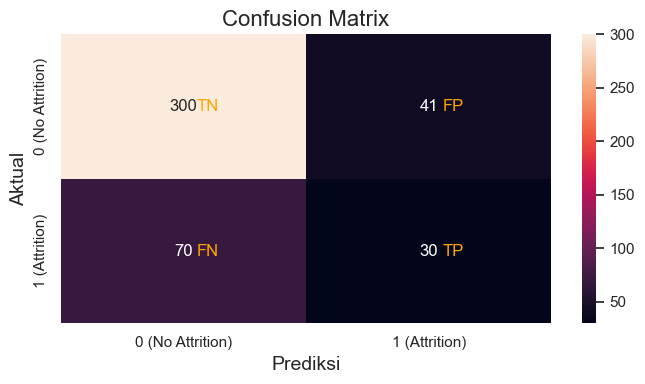

In [48]:
y_pred = dt.predict(Xtest)
cm = confusion_matrix(y_pred , ytest)

print(classification_report(y_pred, ytest))

# Create the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=cm, fmt="d", cbar=True, xticklabels=["0 (No Attrition)", "1 (Attrition)"], yticklabels=["0 (No Attrition)", "1 (Attrition)"])
plt.xlabel("Prediksi", fontsize=14)
plt.ylabel("Aktual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)

labels = np.array([["TN", "FP"], ["FN", "TP"]])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.6, i + 0.5, f"{labels[i, j]}", color="orange", ha="center", va="center", fontsize=12)

plt.tight_layout()
plt.show()

Blok kode dibawah ditujukan untuk melihat parameter model yang sudah dilatih. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

In [145]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

### Random Forest

Blok kode diabawah untuk mendeklarasikan model Random Forest dan melakukan training model Random forest, serta melihat hasil visualisasi-nya. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtrain_smote, ytrain_smote)
eval_classification(rf)

Accuracy (Test Set): 0.84

Cross Validation:
Precision (cross-val test): 0.934699186415925
Recall (cross-val test): 0.886624546309988
F1-Score (cross-val test): 0.9013018130992843


Blok kode dibawah untuk menampilkan confussion metrix dari pelatihan model Random Forest. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       401
           1       0.28      0.50      0.36        40

    accuracy                           0.84       441
   macro avg       0.61      0.69      0.63       441
weighted avg       0.89      0.84      0.86       441



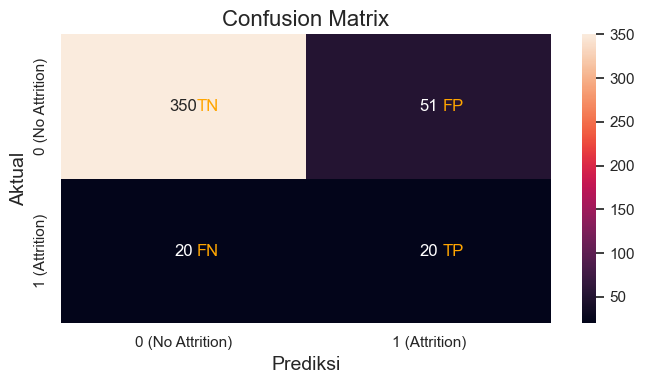

In [51]:
y_pred = rf.predict(Xtest)
cm = confusion_matrix(y_pred , ytest)

print(classification_report(y_pred, ytest))

# Create the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=cm, fmt="d", cbar=True, xticklabels=["0 (No Attrition)", "1 (Attrition)"], yticklabels=["0 (No Attrition)", "1 (Attrition)"])
plt.xlabel("Prediksi", fontsize=14)
plt.ylabel("Aktual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)

labels = np.array([["TN", "FP"], ["FN", "TP"]])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.6, i + 0.5, f"{labels[i, j]}", color="orange", ha="center", va="center", fontsize=12)

plt.tight_layout()
plt.show()

Blok kode dibawah ditujukan untuk melihat parameter model yang sudah dilatih. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

In [141]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### XGBoost

Blok kode diabawah untuk mendeklarasikan model XGBoost dan melakukan training model XGBOOST, serta melihat hasil visualisasi-nya. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

In [53]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(Xtrain_smote, ytrain_smote)
eval_classification(xg)

Accuracy (Test Set): 0.86

Cross Validation:
Precision (cross-val test): 0.9242151001398684
Recall (cross-val test): 0.8670116951203118
F1-Score (cross-val test): 0.8730227625042474


Blok kode dibawah untuk menampilkan confussion metrix dari pelatihan model XGbosst. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       382
           1       0.49      0.59      0.54        59

    accuracy                           0.86       441
   macro avg       0.71      0.75      0.73       441
weighted avg       0.88      0.86      0.87       441



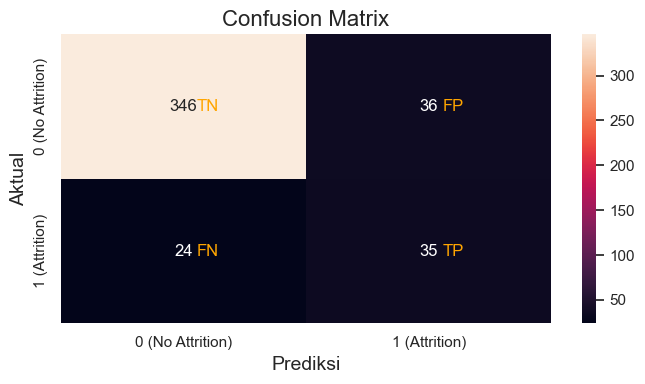

In [54]:
y_pred = xg.predict(Xtest)
cm = confusion_matrix(y_pred , ytest)

print(classification_report(y_pred, ytest))

# Create the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=cm, fmt="d", cbar=True, xticklabels=["0 (No Attrition)", "1 (Attrition)"], yticklabels=["0 (No Attrition)", "1 (Attrition)"])
plt.xlabel("Prediksi", fontsize=14)
plt.ylabel("Aktual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)

labels = np.array([["TN", "FP"], ["FN", "TP"]])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.6, i + 0.5, f"{labels[i, j]}", color="orange", ha="center", va="center", fontsize=12)

plt.tight_layout()
plt.show()

Blok kode dibawah ditujukan untuk melihat parameter model yang sudah dilatih. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

In [142]:
xg.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

### AdaBoost

Blok kode diabawah untuk mendeklarasikan model AdaBoost dan melakukan training model AdaBoost, serta melihat hasil visualisasi-nya. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

In [56]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(Xtrain_smote, ytrain_smote)
eval_classification(ab)

Accuracy (Test Set): 0.83

Cross Validation:
Precision (cross-val test): 0.8623338867756676
Recall (cross-val test): 0.8334319128915176
F1-Score (cross-val test): 0.8196151971024174


Blok kode dibawah untuk menampilkan confussion metrix dari pelatihan model AdaBoost. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       356
           1       0.58      0.48      0.53        85

    accuracy                           0.83       441
   macro avg       0.73      0.70      0.71       441
weighted avg       0.82      0.83      0.83       441



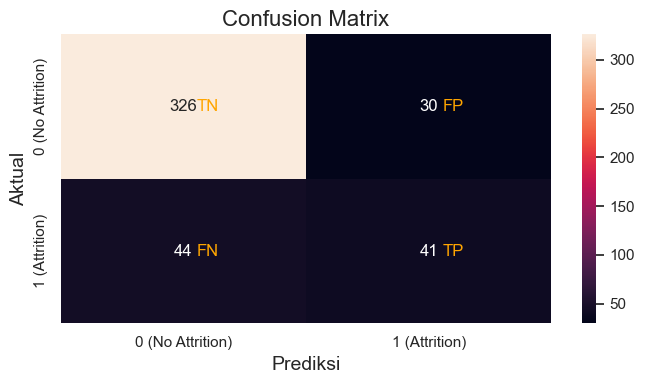

In [57]:
y_pred = ab.predict(Xtest)
cm = confusion_matrix(y_pred , ytest)

print(classification_report(y_pred, ytest))

# Create the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=cm, fmt="d", cbar=True, xticklabels=["0 (No Attrition)", "1 (Attrition)"], yticklabels=["0 (No Attrition)", "1 (Attrition)"])
plt.xlabel("Prediksi", fontsize=14)
plt.ylabel("Aktual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)

labels = np.array([["TN", "FP"], ["FN", "TP"]])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.6, i + 0.5, f"{labels[i, j]}", color="orange", ha="center", va="center", fontsize=12)

plt.tight_layout()
plt.show()

Blok kode dibawah ditujukan untuk melihat parameter model yang sudah dilatih. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

In [143]:
ab.get_params()

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

### CatBoost

Blok kode diabawah untuk mendeklarasikan model CatBoost dan melakukan training model CatBoost, serta melihat hasil visualisasi-nya. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

In [59]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(random_state=42, verbose=False)
cb.fit(Xtrain_smote, ytrain_smote)
eval_classification(cb)

Accuracy (Test Set): 0.88

Cross Validation:
Precision (cross-val test): 0.9402524882849415
Recall (cross-val test): 0.851996236053233
F1-Score (cross-val test): 0.8629408270872514


Blok kode dibawah untuk menampilkan confussion metrix dari pelatihan model CatBoost. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       394
           1       0.45      0.68      0.54        47

    accuracy                           0.88       441
   macro avg       0.71      0.79      0.74       441
weighted avg       0.91      0.88      0.89       441



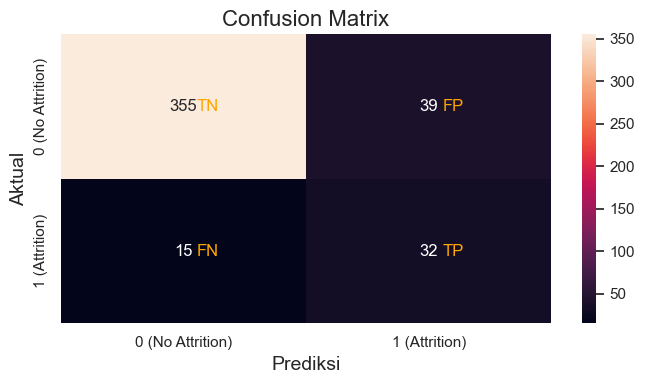

In [60]:
y_pred = cb.predict(Xtest)
cm = confusion_matrix(y_pred , ytest)

print(classification_report(y_pred, ytest))

# Create the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=cm, fmt="d", cbar=True, xticklabels=["0 (No Attrition)", "1 (Attrition)"], yticklabels=["0 (No Attrition)", "1 (Attrition)"])
plt.xlabel("Prediksi", fontsize=14)
plt.ylabel("Aktual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)

labels = np.array([["TN", "FP"], ["FN", "TP"]])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.6, i + 0.5, f"{labels[i, j]}", color="orange", ha="center", va="center", fontsize=12)

plt.tight_layout()
plt.show()

Blok kode dibawah ditujukan untuk melihat parameter model yang sudah dilatih. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

In [144]:
cb.get_params()

{'verbose': False, 'random_state': 42}

## Model Selection

Blok kode dibawah ditujukan untuk membuat visualisasi bar plot terhadap nilai metriks evaluasi dari tiap tiap pelatihan model yang sudah dilakukan. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

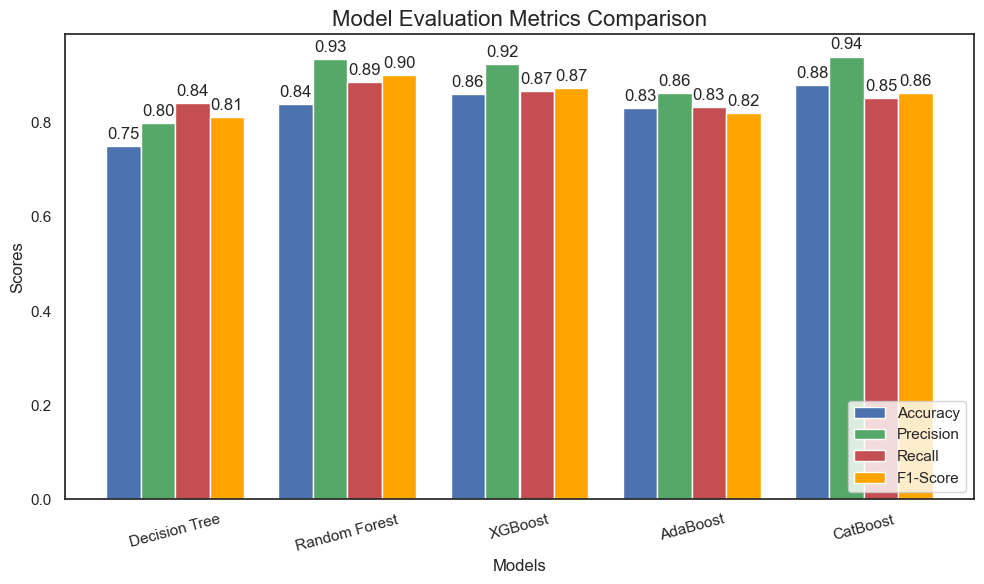

In [63]:
# Data for visualization
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost', 'CatBoost']
accuracy = [0.75, 0.84, 0.86, 0.83, 0.88]
precision = [0.7988, 0.9346, 0.9242, 0.8623, 0.9402]
recall = [0.8414, 0.8866, 0.8670, 0.8334, 0.8519]
f1_score = [0.8118, 0.9013, 0.8730, 0.8196, 0.8629]

# Creating bar positions
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy', color='b')
bars2 = ax.bar(x - 0.5 * width, precision, width, label='Precision', color='g')
bars3 = ax.bar(x + 0.5 * width, recall, width, label='Recall', color='r')
bars4 = ax.bar(x + 1.5 * width, f1_score, width, label='F1-Score', color='orange')

# Adding text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Model Evaluation Metrics Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.legend(loc='lower right')

# Adding value annotations on bars
def add_annotations(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text by 3 points above bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

add_annotations(bars1)
add_annotations(bars2)
add_annotations(bars3)
add_annotations(bars4)

plt.tight_layout()
plt.show()

**Observasi**:
1. **Accuracy**: Compare overall prediction success across models.
2. **Precision**: Focuses on reducing **False Positives** (cases where attrition is predicted but doesn’t occur).
3. **Recall**: Focuses on reducing **False Negatives** (cases where attrition occurs but isn’t predicted).
4. **F1-Score**: Balances Precision and Recall for a holistic evaluation.

**Choosing the Best Model**:
- Look for a model with high **Recall** (reduces False Negatives) and decent **Precision** (reduces False Positives).
- The **F1-Score** complements this by balancing the two metrics.

## Hyperparameter Tunning

### Catboost

Blok kode dibawah ditujukan untuk melakukan hyperparameter tunning untuk model CatBoost menggunakan metode randomized search

In [66]:
# Parameter
parameter = {
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [4, 6, 8],
    'iterations': [100, 200, 500],
    'l2_leaf_reg': [1, 3, 5]
}

# Tunning
cb_hyp = RandomizedSearchCV(CatBoostClassifier(random_state=42),
                           param_distributions=parameter, cv=3, n_jobs=-1, scoring='precision', verbose=1)
cb_hyp.fit(Xtrain_smote, ytrain_smote)

print(f"model train score: {cb_hyp.score(Xtrain_smote, ytrain_smote)},\n"
      f"model test score: {cb_hyp.score(Xtest, ytest)},\n"
      f"model best score: {cb_hyp.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 0.6419231	total: 15.4ms	remaining: 7.67s
1:	learn: 0.6030313	total: 26.5ms	remaining: 6.59s
2:	learn: 0.5705510	total: 36.8ms	remaining: 6.1s
3:	learn: 0.5417204	total: 48.9ms	remaining: 6.07s
4:	learn: 0.5165527	total: 60.2ms	remaining: 5.96s
5:	learn: 0.4929698	total: 75.8ms	remaining: 6.24s
6:	learn: 0.4735574	total: 85.3ms	remaining: 6.01s
7:	learn: 0.4552046	total: 96.5ms	remaining: 5.93s
8:	learn: 0.4391175	total: 107ms	remaining: 5.86s
9:	learn: 0.4238166	total: 118ms	remaining: 5.79s
10:	learn: 0.4091430	total: 128ms	remaining: 5.68s
11:	learn: 0.4010662	total: 137ms	remaining: 5.58s
12:	learn: 0.3894252	total: 146ms	remaining: 5.46s
13:	learn: 0.3724244	total: 156ms	remaining: 5.41s
14:	learn: 0.3636381	total: 164ms	remaining: 5.29s
15:	learn: 0.3535379	total: 172ms	remaining: 5.21s
16:	learn: 0.3464547	total: 183ms	remaining: 5.2s
17:	learn: 0.3386201	total: 198ms	remaining: 5.31s
18:	learn: 0.3300760	tota

Blok kode dibawah ditujukan untuk melihat hasil best parameter berdasarka tunning yang sudah dilakukan

In [71]:
cb_hyp.best_params_

{'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 500, 'depth': 6}

blok kode dibawah dilakukan untuk men-copy hasil parameter tunning yang telah dilakukan, ditujukan untuk melakukan pengembangan model dikemudian hari untuk melakukan randomized search kembai dengan set parameter lain

In [68]:
cb_hyp1 = cb_hyp.best_estimator_

Blok kode dibawah ditujukan untuk melihat evalusai terhadap model yang sudah dilatih dengan parameter hasil tunning

In [69]:
eval_classification(cb_hyp1)

Accuracy (Test Set): 0.87

Cross Validation:
0:	learn: 0.6388033	total: 7.12ms	remaining: 3.55s
1:	learn: 0.5911239	total: 15.1ms	remaining: 3.75s
2:	learn: 0.5538612	total: 21ms	remaining: 3.48s
3:	learn: 0.5153173	total: 28.1ms	remaining: 3.48s
4:	learn: 0.4871112	total: 35.2ms	remaining: 3.49s
5:	learn: 0.4580005	total: 41.1ms	remaining: 3.39s
6:	learn: 0.4177629	total: 49.3ms	remaining: 3.47s
7:	learn: 0.4009757	total: 57.4ms	remaining: 3.53s
8:	learn: 0.3877333	total: 65.9ms	remaining: 3.6s
9:	learn: 0.3702379	total: 71.8ms	remaining: 3.52s
10:	learn: 0.3521878	total: 80.5ms	remaining: 3.58s
11:	learn: 0.3355862	total: 86.8ms	remaining: 3.53s
12:	learn: 0.3235408	total: 94.5ms	remaining: 3.54s
13:	learn: 0.3129617	total: 100ms	remaining: 3.49s
14:	learn: 0.2891242	total: 107ms	remaining: 3.47s
15:	learn: 0.2790614	total: 115ms	remaining: 3.48s
16:	learn: 0.2683708	total: 121ms	remaining: 3.44s
17:	learn: 0.2600168	total: 128ms	remaining: 3.44s
18:	learn: 0.2526338	total: 135ms	rem

Blok kode dibawah untuk melihat visualisasi metrik evaluasi terhadap model yang sudah ditraining

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       395
           1       0.42      0.65      0.51        46

    accuracy                           0.87       441
   macro avg       0.69      0.77      0.72       441
weighted avg       0.90      0.87      0.88       441



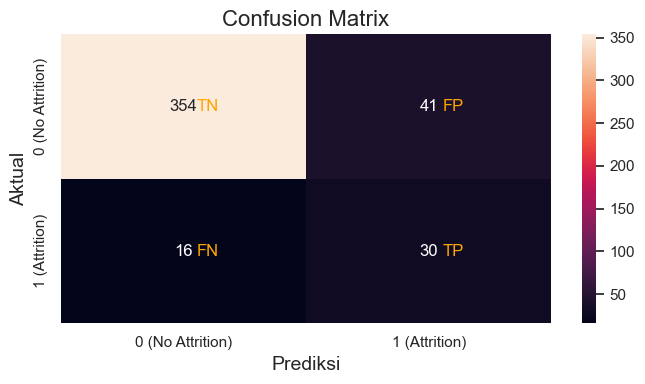

In [70]:
y_pred = cb_hyp1.predict(Xtest)
cm = confusion_matrix(y_pred , ytest)

print(classification_report(y_pred, ytest))

# Create the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=cm, fmt="d", cbar=True, xticklabels=["0 (No Attrition)", "1 (Attrition)"], yticklabels=["0 (No Attrition)", "1 (Attrition)"])
plt.xlabel("Prediksi", fontsize=14)
plt.ylabel("Aktual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)

labels = np.array([["TN", "FP"], ["FN", "TP"]])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.6, i + 0.5, f"{labels[i, j]}", color="orange", ha="center", va="center", fontsize=12)

plt.tight_layout()
plt.show()

Blok kode dibawah ditujukan untuk melihat visualisasi metric evaluasi hasil pelatihan model dengan parameter semula vs tunning parameter. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

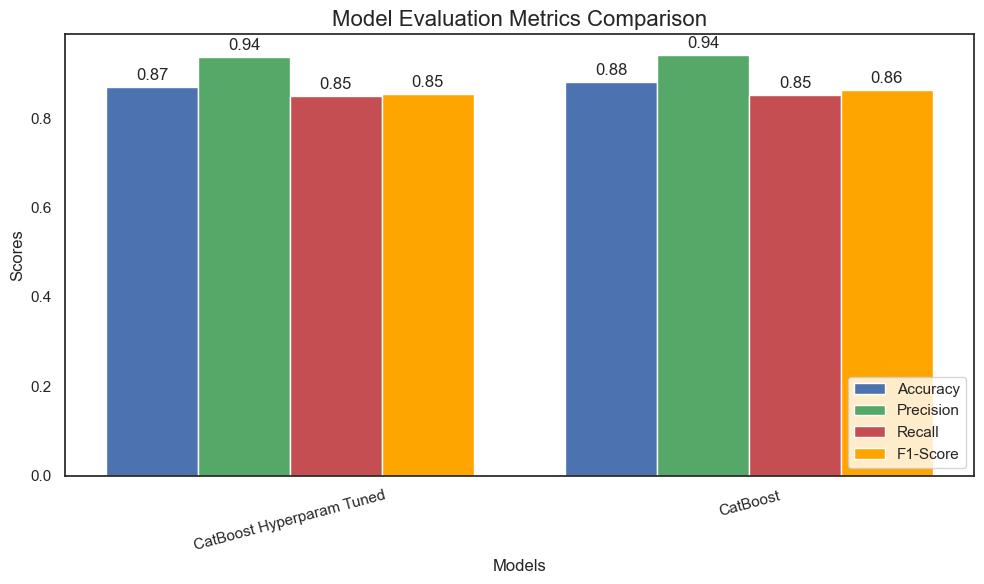

In [73]:
# Data for visualization
models = ['CatBoost Hyperparam Tuned', 'CatBoost']
accuracy = [0.87, 0.88]
precision = [0.9364, 0.9402]
recall = [0.8496, 0.8519]
f1_score = [0.8538, 0.862]

# Creating bar positions
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy', color='b')
bars2 = ax.bar(x - 0.5 * width, precision, width, label='Precision', color='g')
bars3 = ax.bar(x + 0.5 * width, recall, width, label='Recall', color='r')
bars4 = ax.bar(x + 1.5 * width, f1_score, width, label='F1-Score', color='orange')

# Adding text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Model Evaluation Metrics Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.legend(loc='lower right')

# Adding value annotations on bars
def add_annotations(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text by 3 points above bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

add_annotations(bars1)
add_annotations(bars2)
add_annotations(bars3)
add_annotations(bars4)

plt.tight_layout()
plt.show()

- Berdasarkan Hasil Observasi Model yang meberikan hasil evaluasi terbaik CatBoost dengan default parameter, sehingga model CatBoost siap untuk di deploy

## Feature Importance

Blok kode dibawah ditujukan untuk melihat fitu imprtance hasil pelatihan model catboost. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

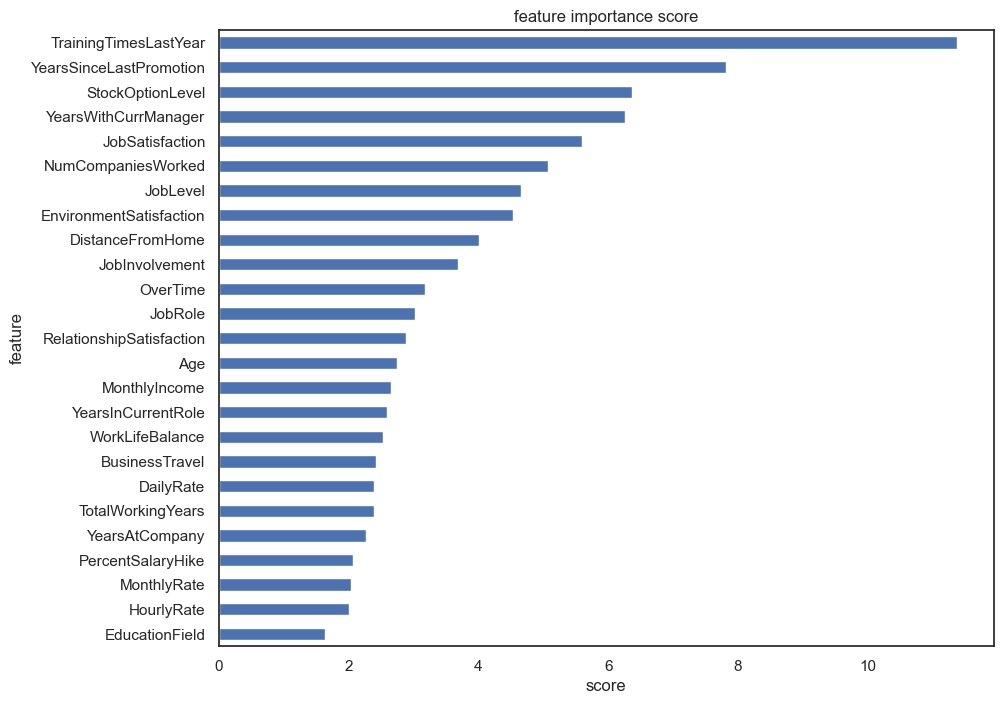

In [75]:
show_feature_importance(cb)

Blok kode dibawah untuk melihat SHap Value hasil Training model catboost, untuk melihat dampak dari tiap fitur terhadap hasil prediksi. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

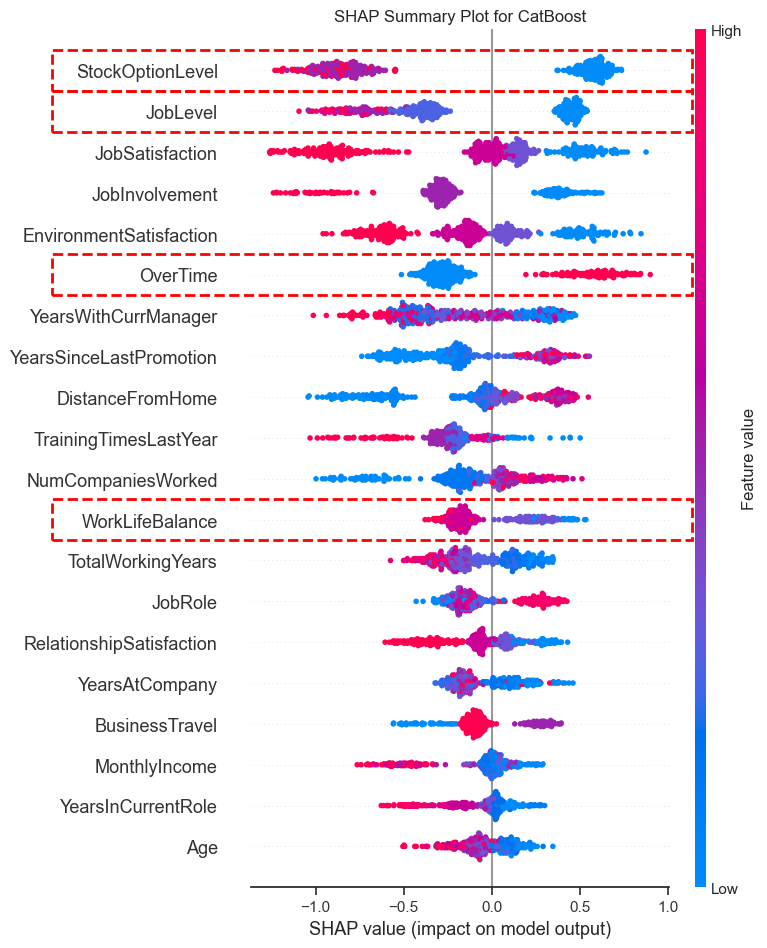

In [133]:
import shap

# Create a decision tree model with the optimal max_depth value
optimal_max_depth = 9  # You can change this based on your analysis
#best_xg2 = xg_hyp2
model = cb
model.fit(Xtrain_smote, ytrain_smote)

# Create an explainer object for the model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(Xtest)

# Plot the summary plot
shap.summary_plot(shap_values, Xtest, feature_names=Xtest.columns, show=False)
plt.title("SHAP Summary Plot for CatBoost")

# Add boxes to emphasize specific features
features_to_emphasize = ["StockOptionLevel", "JobLevel", "OverTime", "WorkLifeBalance"]

# Get the positions of feature names in the plot
ax = plt.gca()  # Get the current axes
yticks = ax.get_yticks()  # Get the y-tick positions
yticklabels = [tick.get_text() for tick in ax.get_yticklabels()]  # Get the y-tick labels

# Convert data coordinates to figure coordinates
for feature in features_to_emphasize:
    if feature in yticklabels:
        y_pos = yticks[yticklabels.index(feature)]  # Get the y-position of the feature
        
        # Convert data coordinates to display coordinates
        trans = ax.transData.transform
        trans_inv = plt.gcf().transFigure.inverted().transform
        
        # Coordinates in data space
        data_coords = trans((-2.5, y_pos - 0.5))
        data_coords_upper = trans((4.0, y_pos + 0.5))
        
        # Transform to figure space
        fig_coords = trans_inv(data_coords)
        fig_coords_upper = trans_inv(data_coords_upper)
        
        # Define the rectangle in figure space
        rect = patches.Rectangle(
            (fig_coords[0], fig_coords[1]),  # Bottom-left corner
            0.8,  # Width
            fig_coords_upper[1] - fig_coords[1],  # Height
            linewidth=2,
            edgecolor='red',
            facecolor='none',
            linestyle="--",
            transform=plt.gcf().transFigure,  # Apply figure transformation
        )
        plt.gcf().add_artist(rect)  # Add rectangle to the figure

plt.show()

Berdasarkan Diagram SHAP (SHapley Additive exPlanations), didapati beberapa variabel memberikan pengaruh yang signifikan pada klasifikasi model. Variabel-variabel yang paling berkontribusi dalam memisahkan klasifikasi adalah sebagai berikut:

- **StockOptionLevel**: Variabel ini mencerminkan tingkat opsi saham yang dimiliki karyawan. Semakin rendah tingkat opsi saham, semakin besar kemungkinan karyawan mengalami attrition, mengindikasikan bahwa insentif saham dapat berfungsi sebagai mekanisme retensi yang efektif.

- **JobLevel**: Tingkat pekerjaan karyawan memiliki pengaruh signifikan terhadap keputusan untuk bertahan atau meninggalkan perusahaan. Karyawan pada level pekerjaan yang lebih tinggi cenderung memiliki tingkat attrition yang lebih rendah, mungkin karena kompensasi yang lebih besar atau tanggung jawab yang lebih menarik.

- **Overtime**: Karyawan yang sering bekerja lembur memiliki kecenderungan attrition yang lebih tinggi. Hal ini menunjukkan bahwa keseimbangan antara kehidupan kerja dan pribadi menjadi faktor penting yang memengaruhi kepuasan kerja dan keputusan untuk tetap bekerja.

- **WorkLifeBalance**: Tingkat keseimbangan kerja dan kehidupan memiliki dampak besar terhadap tingkat attrition. Karyawan yang menilai keseimbangan kerja-hidup mereka buruk lebih mungkin untuk meninggalkan perusahaan, menyoroti pentingnya menciptakan lingkungan kerja yang mendukung kesejahteraan karyawan.

Analisis ini memberikan wawasan bahwa perusahaan dapat fokus pada kebijakan yang meningkatkan keseimbangan kerja-hidup, memberikan penghargaan yang kompetitif, serta mengelola beban kerja untuk mengurangi attrition dan meningkatkan retensi karyawan.